In [98]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

'''
src_path = sys.path[0].replace("figures\visualization\script", "src")
#replace notebook as scripts
data_path = sys.path[0].replace("figures\visualization\script", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("figures\visualization\script", "output")
'''

# set default params of plot
rc_={
    "figure.dpi":300,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
    "legend.frameon":False
}
plt.rcParams.update(rc_)


In [99]:
# load encoded pv data
df_ori = pd.read_csv(r'L:\Coding_project\Energy_grid_new_exp_local\XGBoost_pred\model\target_encode_all-features_target_1h-2/PV_sum_real.csv')

In [100]:
df_ori['DateTime']=pd.to_datetime(df_ori["DateTime"])

In [101]:
df_ori.set_index("DateTime", inplace=True)

In [102]:
df_ori

RealPower  hour     quarter       month  dayofmonth   
DateTime                                                                   
2017-01-01 00:00:00        0.0   0.0  308.772993  233.597303  358.513541  \
2017-01-01 00:15:00        0.0   0.0  308.772993  233.597303  358.513541   
2017-01-01 00:30:00        0.0   0.0  308.772993  233.597303  358.513541   
2017-01-01 00:45:00        0.0   0.0  308.772993  233.597303  358.513541   
2017-01-01 01:00:00        0.0   0.0  308.772993  233.597303  358.513541   
...                        ...   ...         ...         ...         ...   
2020-02-29 22:45:00        0.0   0.0  308.772993  302.693101  346.855372   
2020-02-29 23:00:00        0.0   0.0  308.772993  302.693101  346.855372   
2020-02-29 23:15:00        0.0   0.0  308.772993  302.693101  346.855372   
2020-02-29 23:30:00        0.0   0.0  308.772993  302.693101  346.855372   
2020-02-29 23:45:00        0.0   0.0  308.772993  302.693101  346.855372   

                     solar_zenith  solar_azimuth   temp  feels_like  temp_min   
DateTime                                                                        
2017-01-01 00:00:00    321.622853            0.0  13.58       13.34     12.93  \
2017-01-01 00:15:00    324.307735            0.0  13.58       13.34     12.93   
2017-01-01 00:30:00    310.819551            0.0  13.58       13.34     12.93   
2017-01-01 00:45:00    316.356205            0.0  13.58       13.34     12.93   
2017-01-01 01:00:00    356.853086            0.0  12.52       12.31     11.93   
...                           ...            ...    ...         ...       ...   
2020-02-29 22:45:00    413.200749            0.0    NaN         NaN       NaN   
2020-02-29 23:00:00    628.901474            0.0    NaN         NaN       NaN   
2020-02-29 23:15:00    316.356205            0.0    NaN         NaN       NaN   
2020-02-29 23:30:00    310.792727            0.0    NaN         NaN       NaN   
2020-02-29 23:45:00    295.451505            0.0    NaN         NaN       NaN   

                     ...  temp_max_-1h  pressure_-1h  humidity_-1h   
DateTime             ...                                             
2017-01-01 00:00:00  ...           NaN           NaN           NaN  \
2017-01-01 00:15:00  ...         13.93        1012.0    532.465757   
2017-01-01 00:30:00  ...         13.93        1012.0    532.465757   
2017-01-01 00:45:00  ...         13.93        1012.0    532.465757   
2017-01-01 01:00:00  ...         13.93        1012.0    532.465757   
...                  ...           ...           ...           ...   
2020-02-29 22:45:00  ...           NaN           NaN           NaN   
2020-02-29 23:00:00  ...           NaN           NaN           NaN   
2020-02-29 23:15:00  ...           NaN           NaN           NaN   
2020-02-29 23:30:00  ...           NaN           NaN           NaN   
2020-02-29 23:45:00  ...           NaN           NaN           NaN   

                     wind_speed_-1h  wind_deg_-1h  rain_1h_-1h  rain_3h_-1h   
DateTime                                                                      
2017-01-01 00:00:00             NaN           NaN          NaN          NaN  \
2017-01-01 00:15:00       72.102874    292.974963    97.816501          NaN   
2017-01-01 00:30:00       72.102874    292.974963    97.816501          NaN   
2017-01-01 00:45:00       72.102874    292.974963    97.816501          NaN   
2017-01-01 01:00:00       72.102874    292.974963    97.816501          NaN   
...                             ...           ...          ...          ...   
2020-02-29 22:45:00             NaN           NaN          NaN          NaN   
2020-02-29 23:00:00             NaN           NaN          NaN          NaN   
2020-02-29 23:15:00             NaN           NaN          NaN          NaN   
2020-02-29 23:30:00             NaN           NaN          NaN          NaN   
2020-02-29 23:45:00             NaN           NaN          NaN          NaN   

                     snow_1h_-1h  snow_

In [103]:
df_ori = df_ori.interpolate()

In [106]:

df_norm = (df_ori - df_ori.min()) / (df_ori.max() - df_ori.min())

In [107]:
df_norm

RealPower  hour   quarter     month  dayofmonth   
DateTime                                                               
2017-01-01 00:00:00        0.0   0.0  0.309452  0.031129    0.814086  \
2017-01-01 00:15:00        0.0   0.0  0.309452  0.031129    0.814086   
2017-01-01 00:30:00        0.0   0.0  0.309452  0.031129    0.814086   
2017-01-01 00:45:00        0.0   0.0  0.309452  0.031129    0.814086   
2017-01-01 01:00:00        0.0   0.0  0.309452  0.031129    0.814086   
...                        ...   ...       ...       ...         ...   
2020-02-29 22:45:00        0.0   0.0  0.309452  0.334056    0.647826   
2020-02-29 23:00:00        0.0   0.0  0.309452  0.334056    0.647826   
2020-02-29 23:15:00        0.0   0.0  0.309452  0.334056    0.647826   
2020-02-29 23:30:00        0.0   0.0  0.309452  0.334056    0.647826   
2020-02-29 23:45:00        0.0   0.0  0.309452  0.334056    0.647826   

                     solar_zenith  solar_azimuth      temp  feels_like   
DateTime                                                                 
2017-01-01 00:00:00      0.387790            0.0  0.278590    0.325612  \
2017-01-01 00:15:00      0.391027            0.0  0.278590    0.325612   
2017-01-01 00:30:00      0.374764            0.0  0.278590    0.325612   
2017-01-01 00:45:00      0.381440            0.0  0.278590    0.325612   
2017-01-01 01:00:00      0.430268            0.0  0.244917    0.292007   
...                           ...            ...       ...         ...   
2020-02-29 22:45:00      0.498208            0.0  0.398030    0.446330   
2020-02-29 23:00:00      0.758285            0.0  0.398030    0.446330   
2020-02-29 23:15:00      0.381440            0.0  0.398030    0.446330   
2020-02-29 23:30:00      0.374732            0.0  0.398030    0.446330   
2020-02-29 23:45:00      0.356234            0.0  0.398030    0.446330   

                     temp_min  ...  temp_max_-1h  pressure_-1h  humidity_-1h   
DateTime                       ...                                             
2017-01-01 00:00:00  0.339460  ...           NaN           NaN           NaN  \
2017-01-01 00:15:00  0.339460  ...      0.220852      0.393939      0.730224   
2017-01-01 00:30:00  0.339460  ...      0.220852      0.393939      0.730224   
2017-01-01 00:45:00  0.339460  ...      0.220852      0.393939      0.730224   
2017-01-01 01:00:00  0.310741  ...      0.220852      0.393939      0.730224   
...                       ...  ...           ...           ...           ...   
2020-02-29 22:45:00  0.425617  ...      0.351177      0.454545      0.431080   
2020-02-29 23:00:00  0.425617  ...      0.351177      0.454545      0.431080   
2020-02-29 23:15:00  0.425617  ...      0.351177      0.454545      0.431080   
2020-02-29 23:30:00  0.425617  ...      0.351177      0.454545      0.431080   
2020-02-29 23:45:00  0.425617  ...      0.351177      0.454545      0.431080   

                     wind_speed_-1h  wind_deg_-1h  rain_1h_-1h  rain_3h_-1h   
DateTime                                                                      
2017-01-01 00:00:00             NaN           NaN          NaN          NaN  \
2017-01-01 00:15:00        0.124471      0.406715     0.079601          NaN   
2017-01-01 00:30:00        0.124471      0.406715     0.079601          NaN   
2017-01-01 00:45:00        0.124471      0.406715     0.079601          NaN   
2017-01-01 01:00:00        0.124471      0.406715     0.079601          NaN   
...                             ...           ...          ...          ...   
2020-02-29 22:45:00        0.265699      0.326258     0.374361     0.350322   
2020-02-29 23:00:00        0.265699      0.326258     0.374361     0.350322   
2020-02-29 23:15:00        0.265699      0.326258     0.374361     0.350322   
2020-02-29 23:30:00        0.265699      0.326258     0.374361     0.350322   
2020-02-29 23:45:00        0.265699      0.326258     0.374361     0.350322   

                     snow_1h_-1h  snow_3h_-1h  cloud

In [118]:
def person_moving_window(df_ori,key,tstart,tend,r_window_size):    

    columns=['RealPower']
    columns.append(key)
    df=df_ori[columns]
    df=df[tstart:tend]

    rolling_r = df['RealPower'].rolling(window=r_window_size, center=True).corr(df[key])
    f,ax=plt.subplots(2,1,figsize=(14,8),sharex=True,dpi=300)
    df.rolling(window=30,center=True).median().plot(ax=ax[0])
    ax[0].set(xlabel='Frame',ylabel='PV load')
    ax[0].set_ylim([-0.1,1.1])
    ax[0].legend(loc="upper left")
    rolling_r.plot(ax=ax[1])
    print(rolling_r.mean())
    ax[1].set(xlabel='Date',ylabel='Pearson r')
    ax[1].set_ylim([-1,1])
    ax[1].axhline(y=rolling_r.mean(), color='seagreen', linestyle='--', linewidth=1, label='Avg='+str(np.round(rolling_r.mean(),3)))
    ax[1].legend(loc="upper left")

    plt.suptitle("PV and "+key+" data rolling window("+str(r_window_size)+") correlation")
    plt.tight_layout()
    plt.savefig("PV_"+key+"_person_"+\
        str(tstart.date())+"_"+str(tend.date()))
    plt.show()

0.39647640993897065


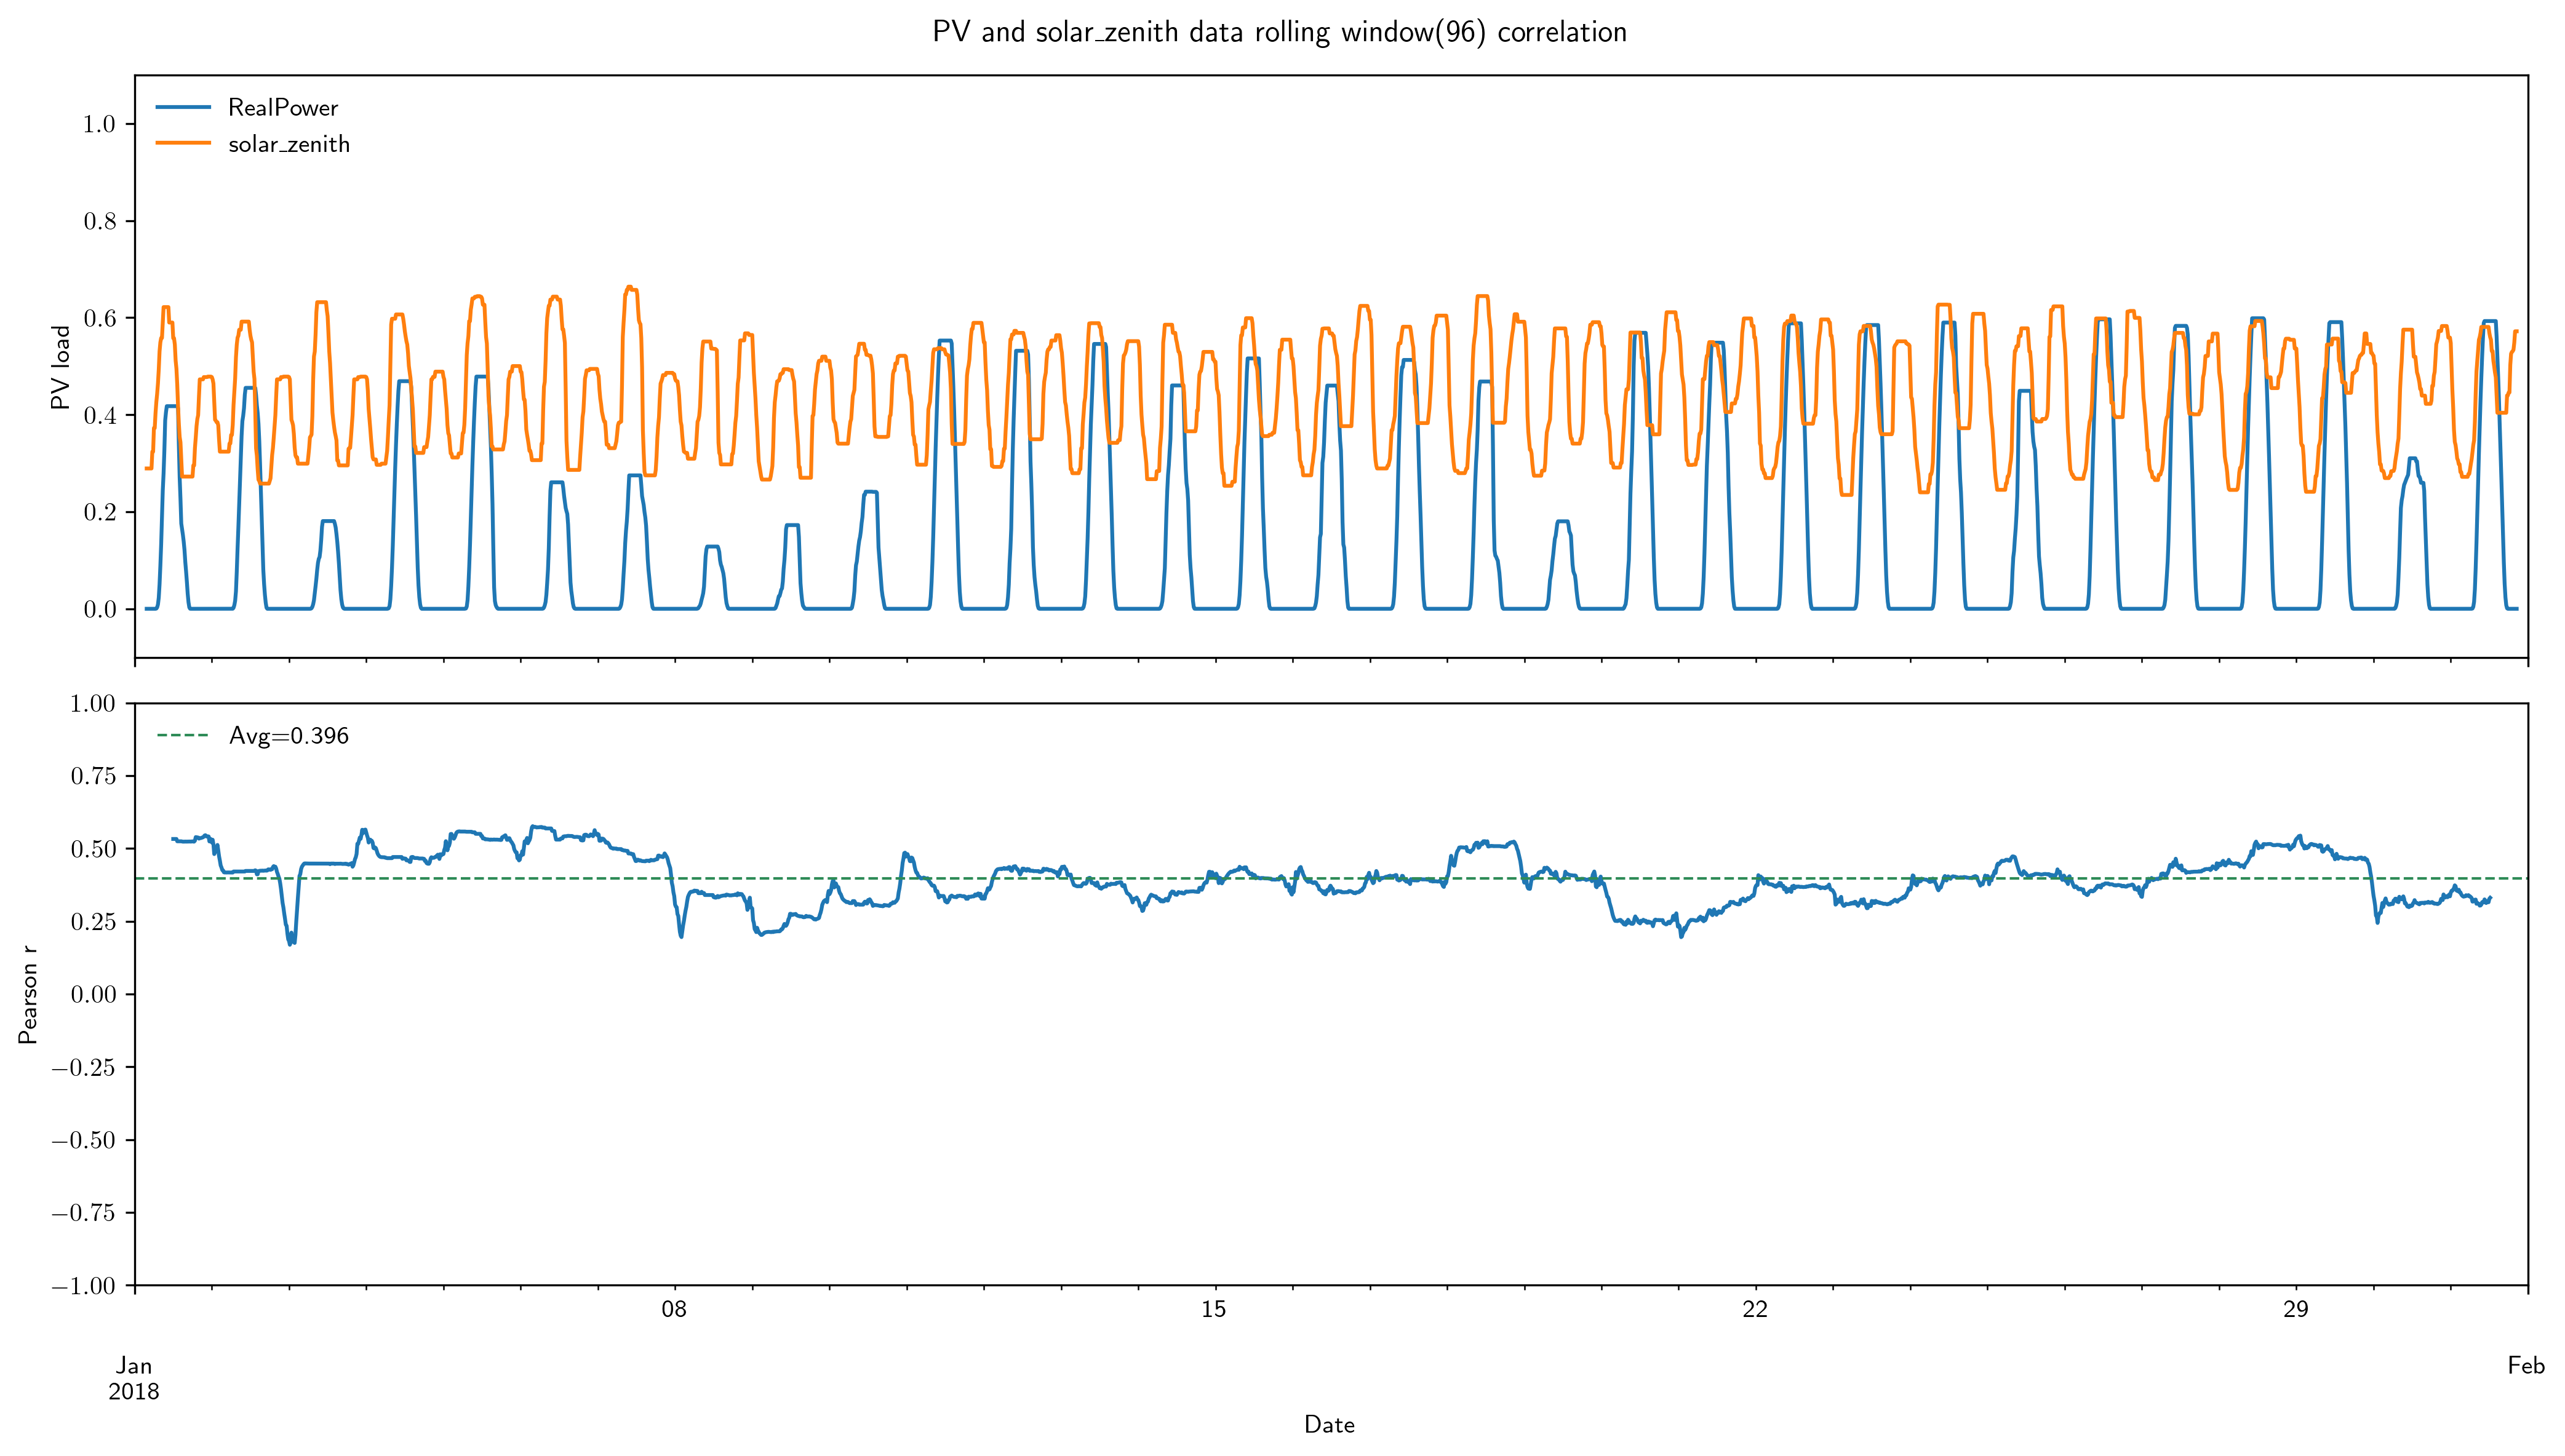

In [119]:
tstart=pd.to_datetime('2018-01-01')
tend=pd.to_datetime('2018-02-01')

person_moving_window(
    df_norm,
    'solar_zenith',
    tstart,
    tend,
    96
)

0.39647640993897065


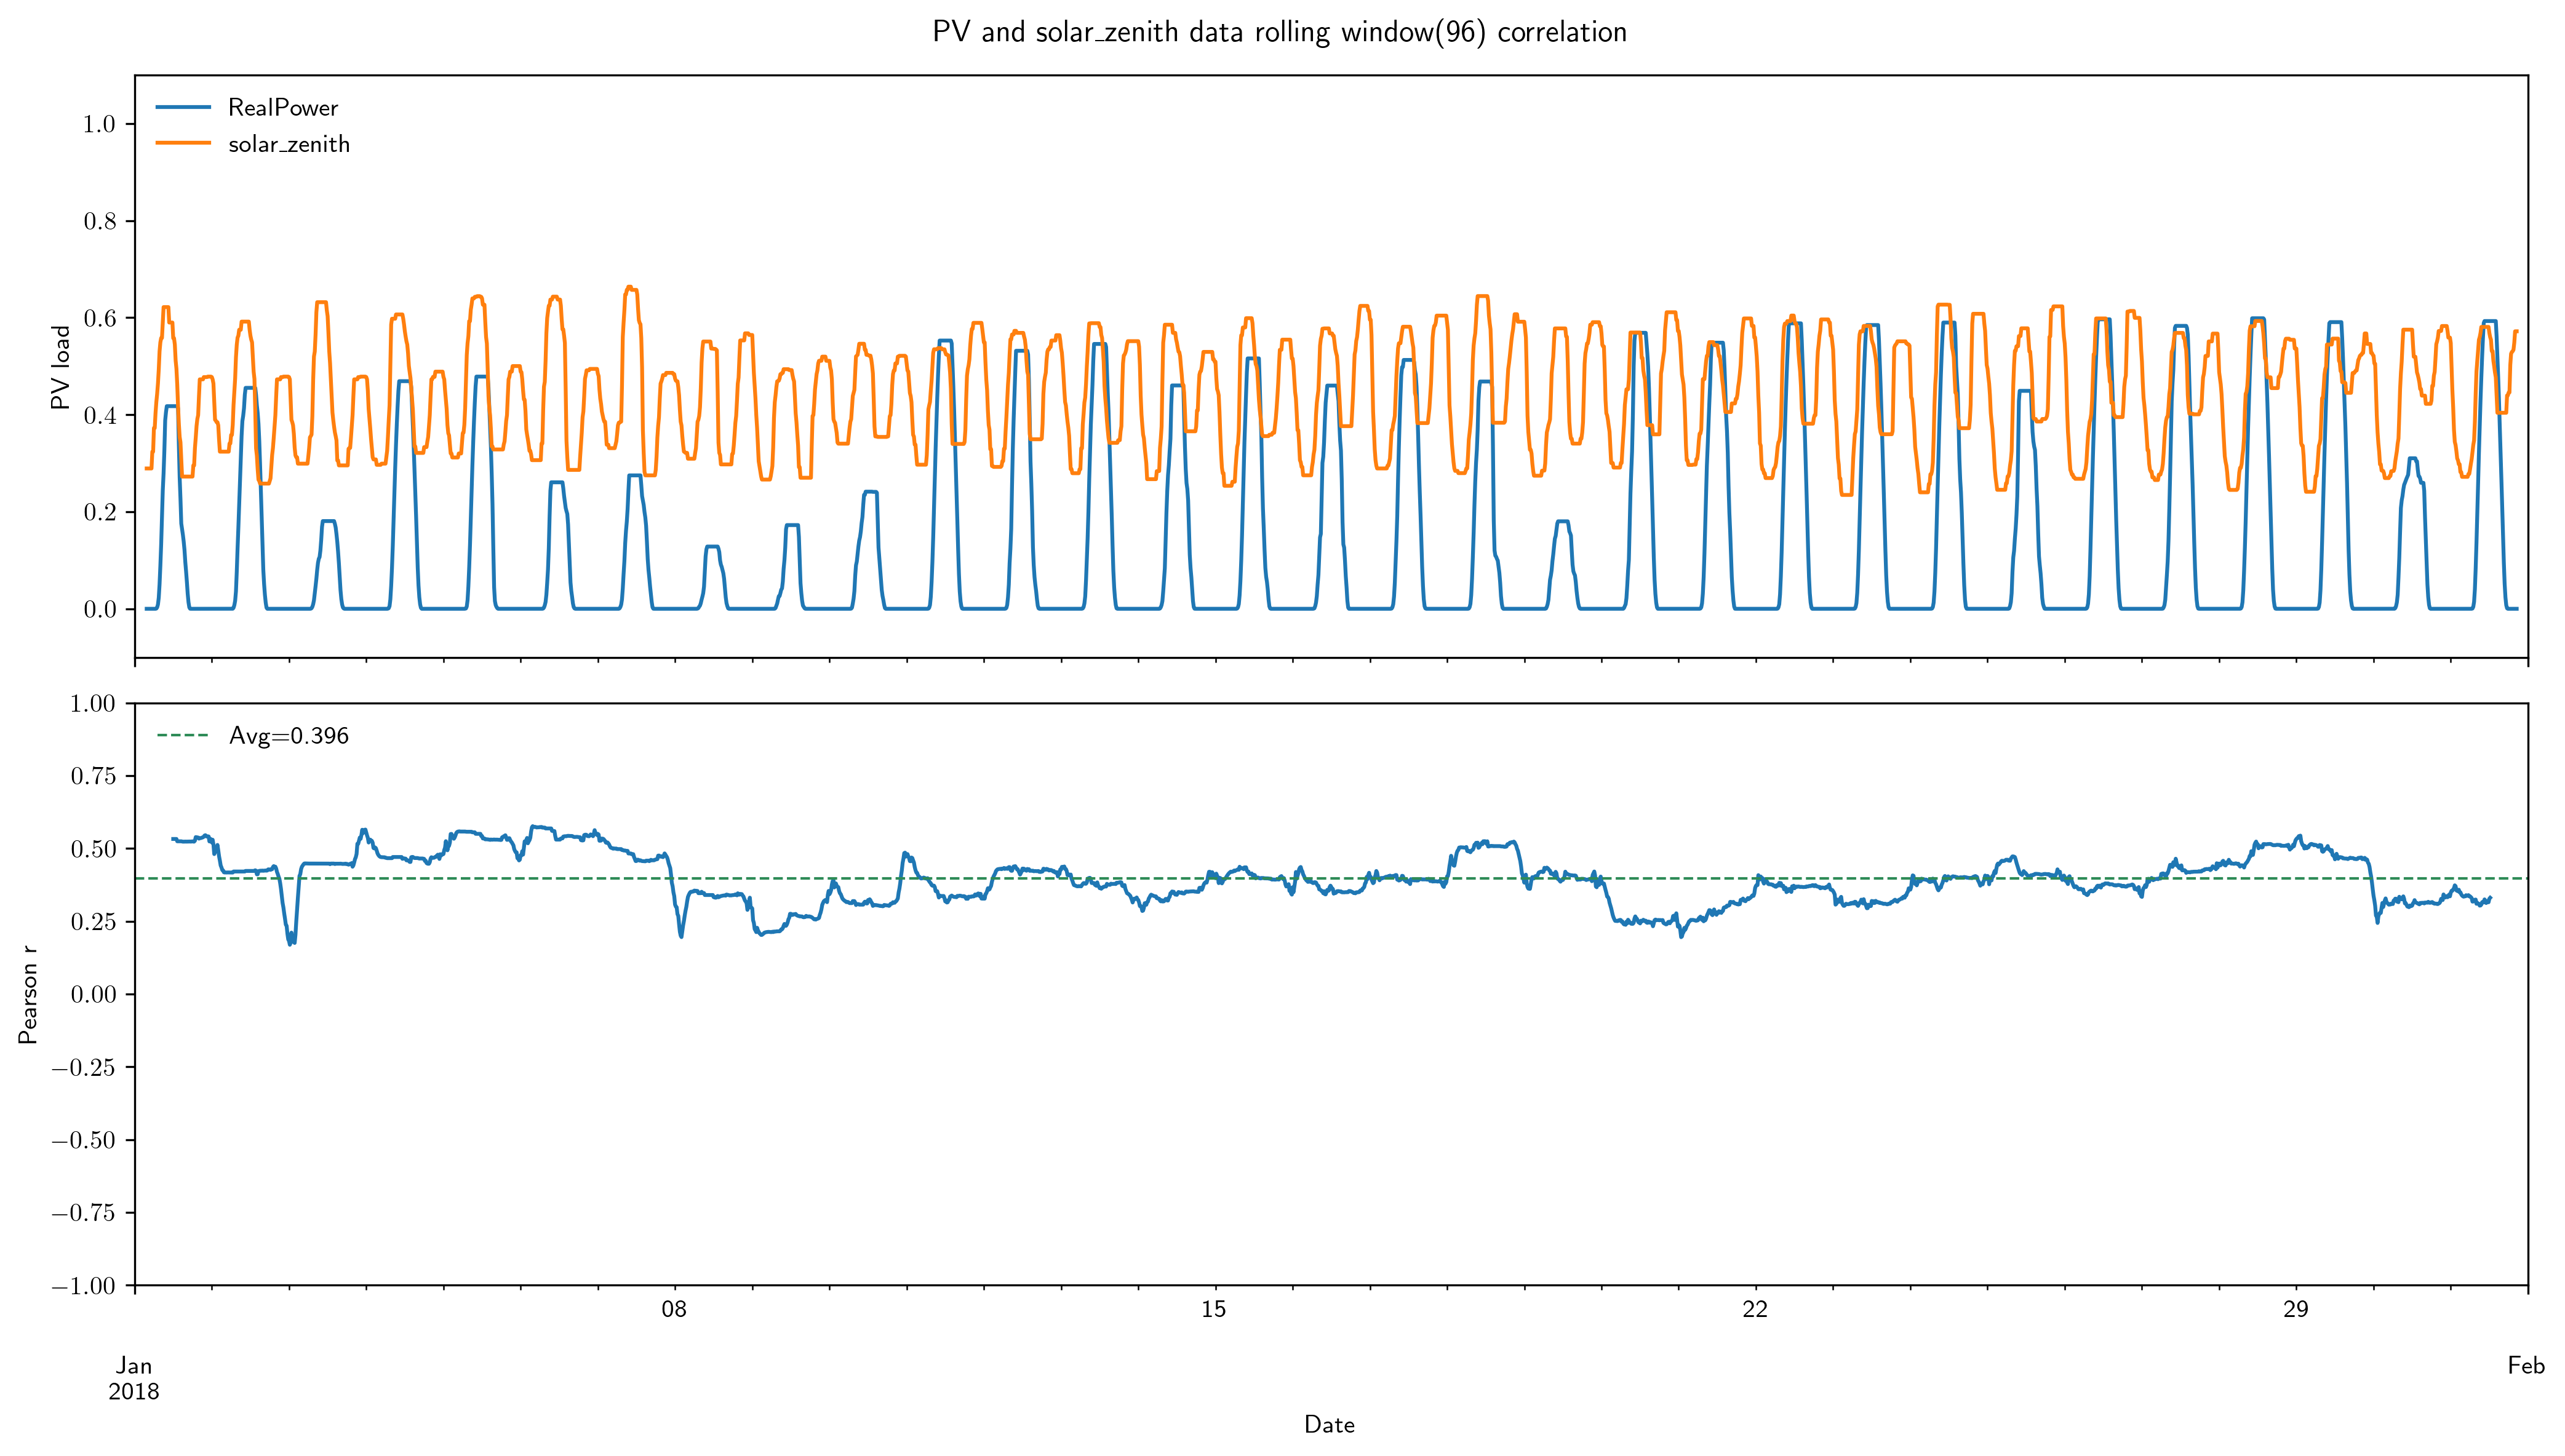

-0.6430239210034822


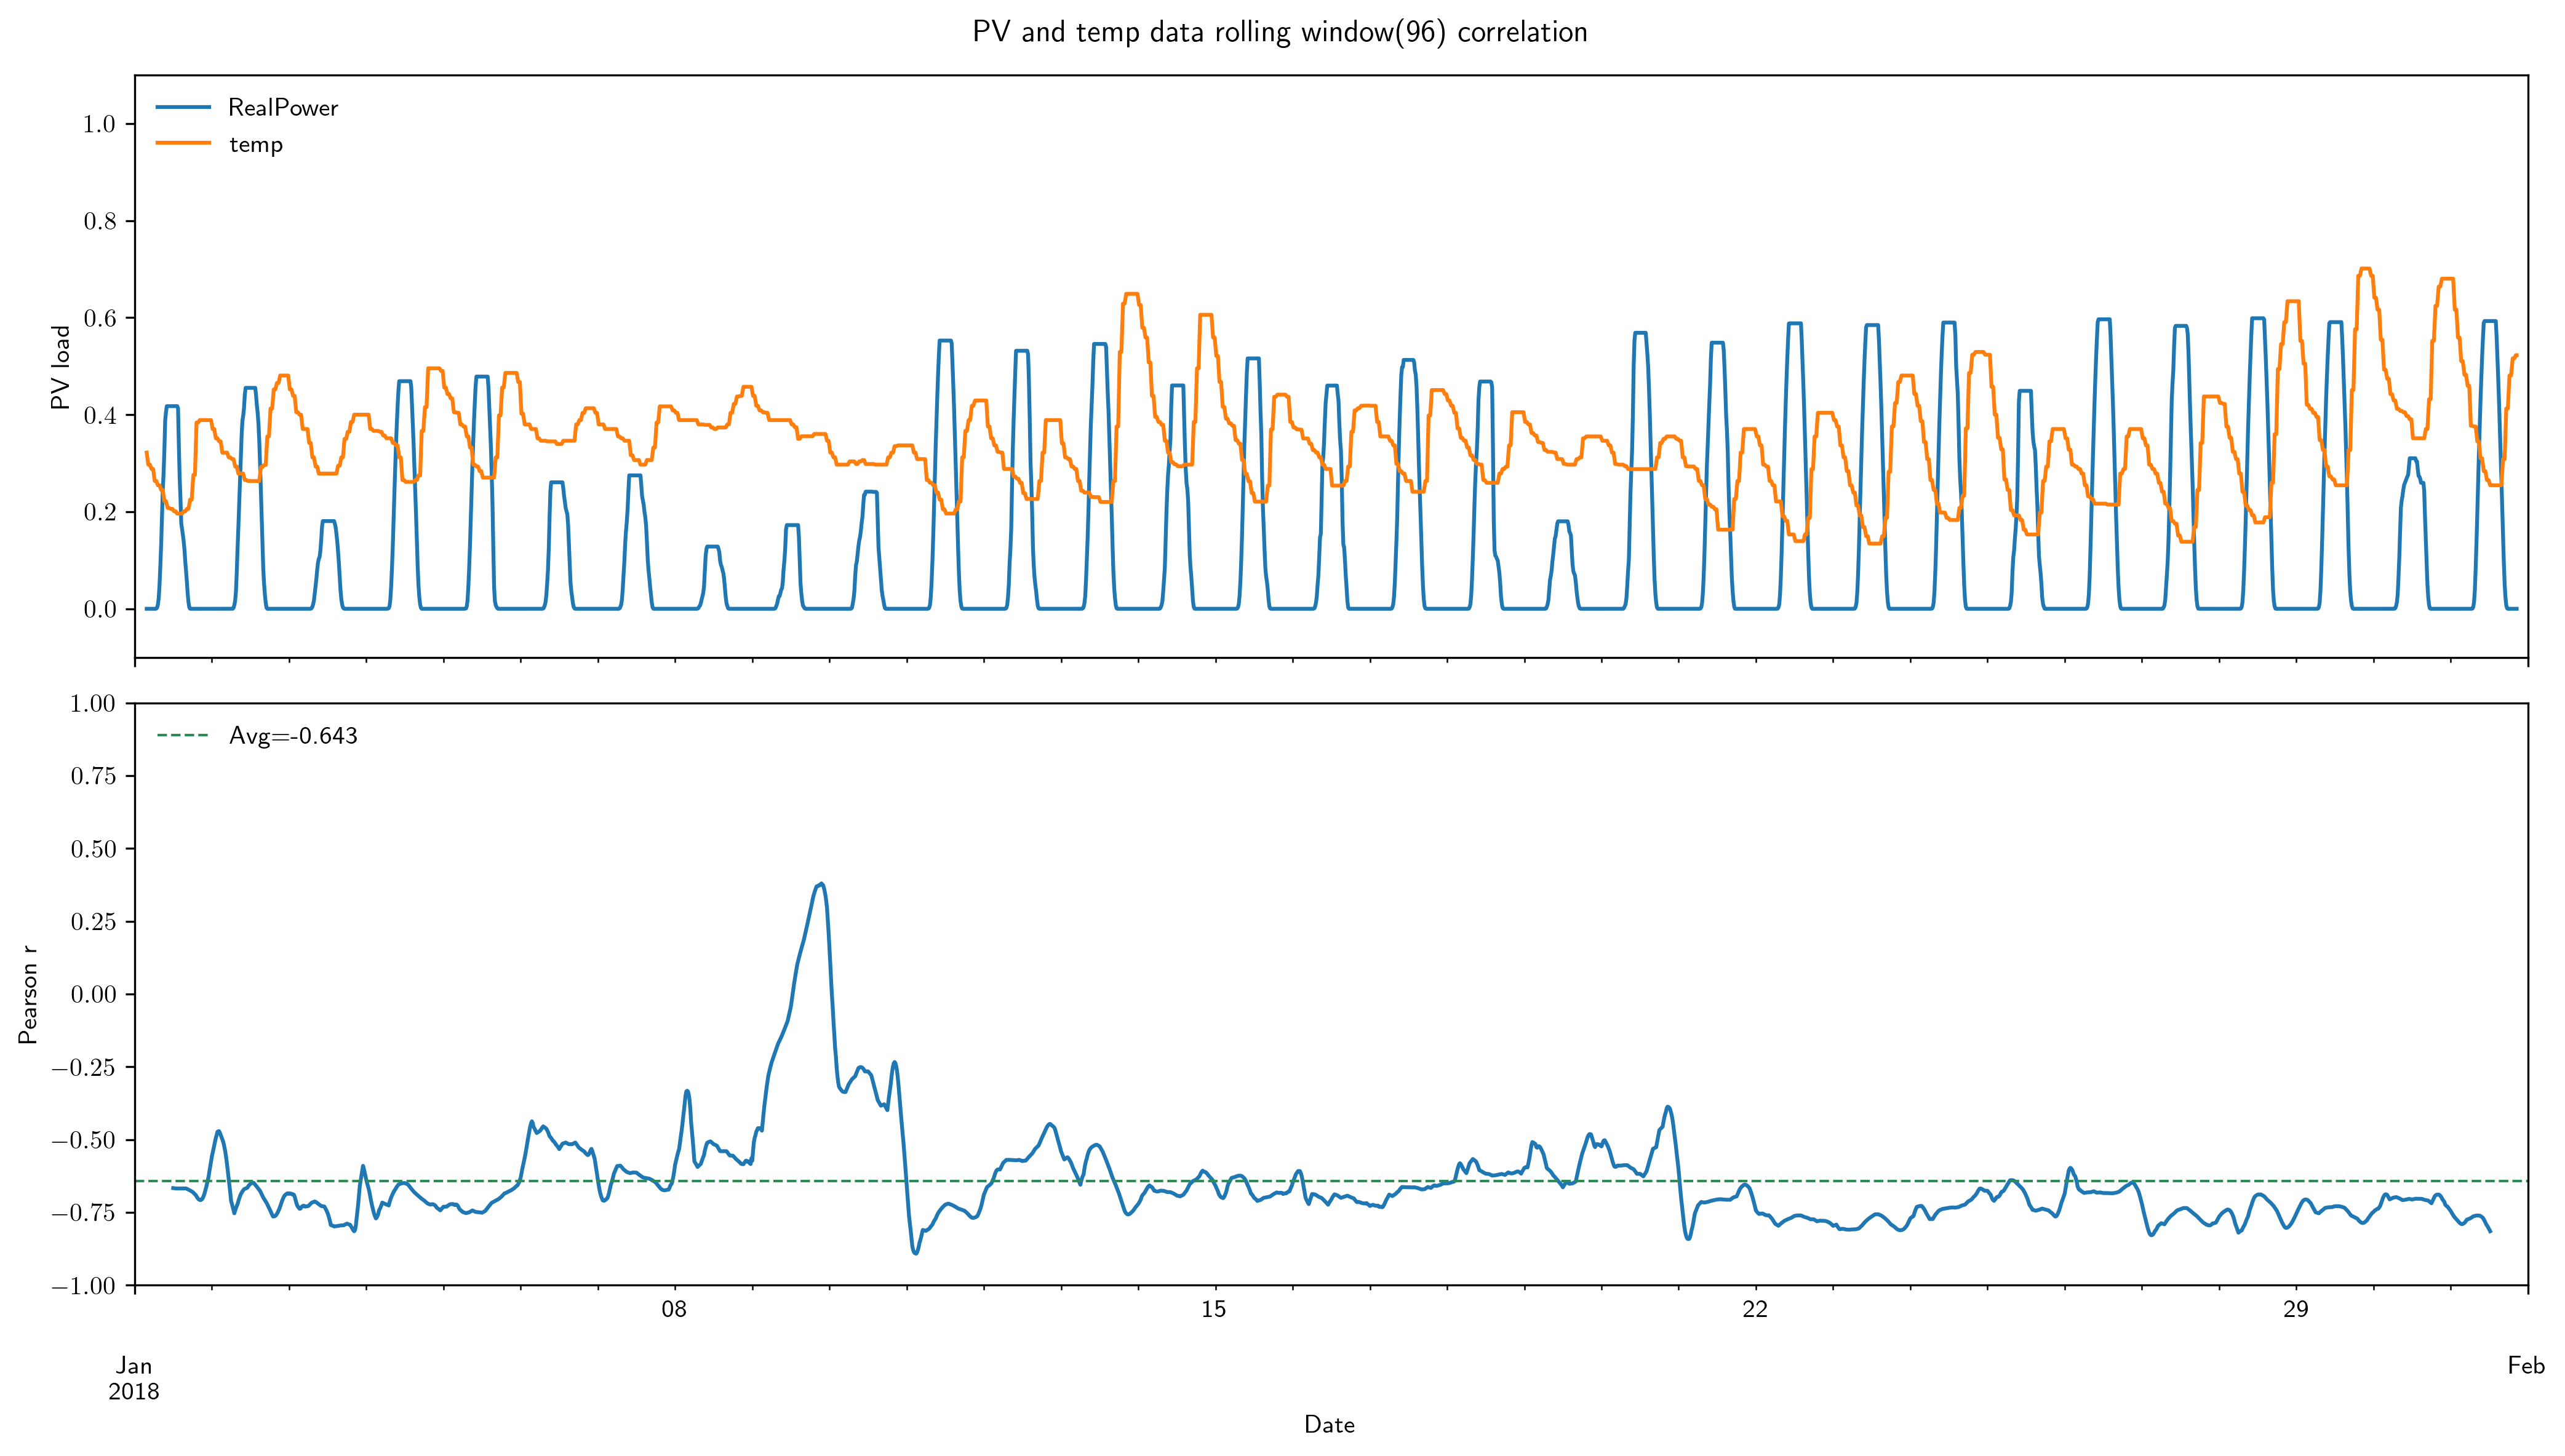

-0.6330565057861817


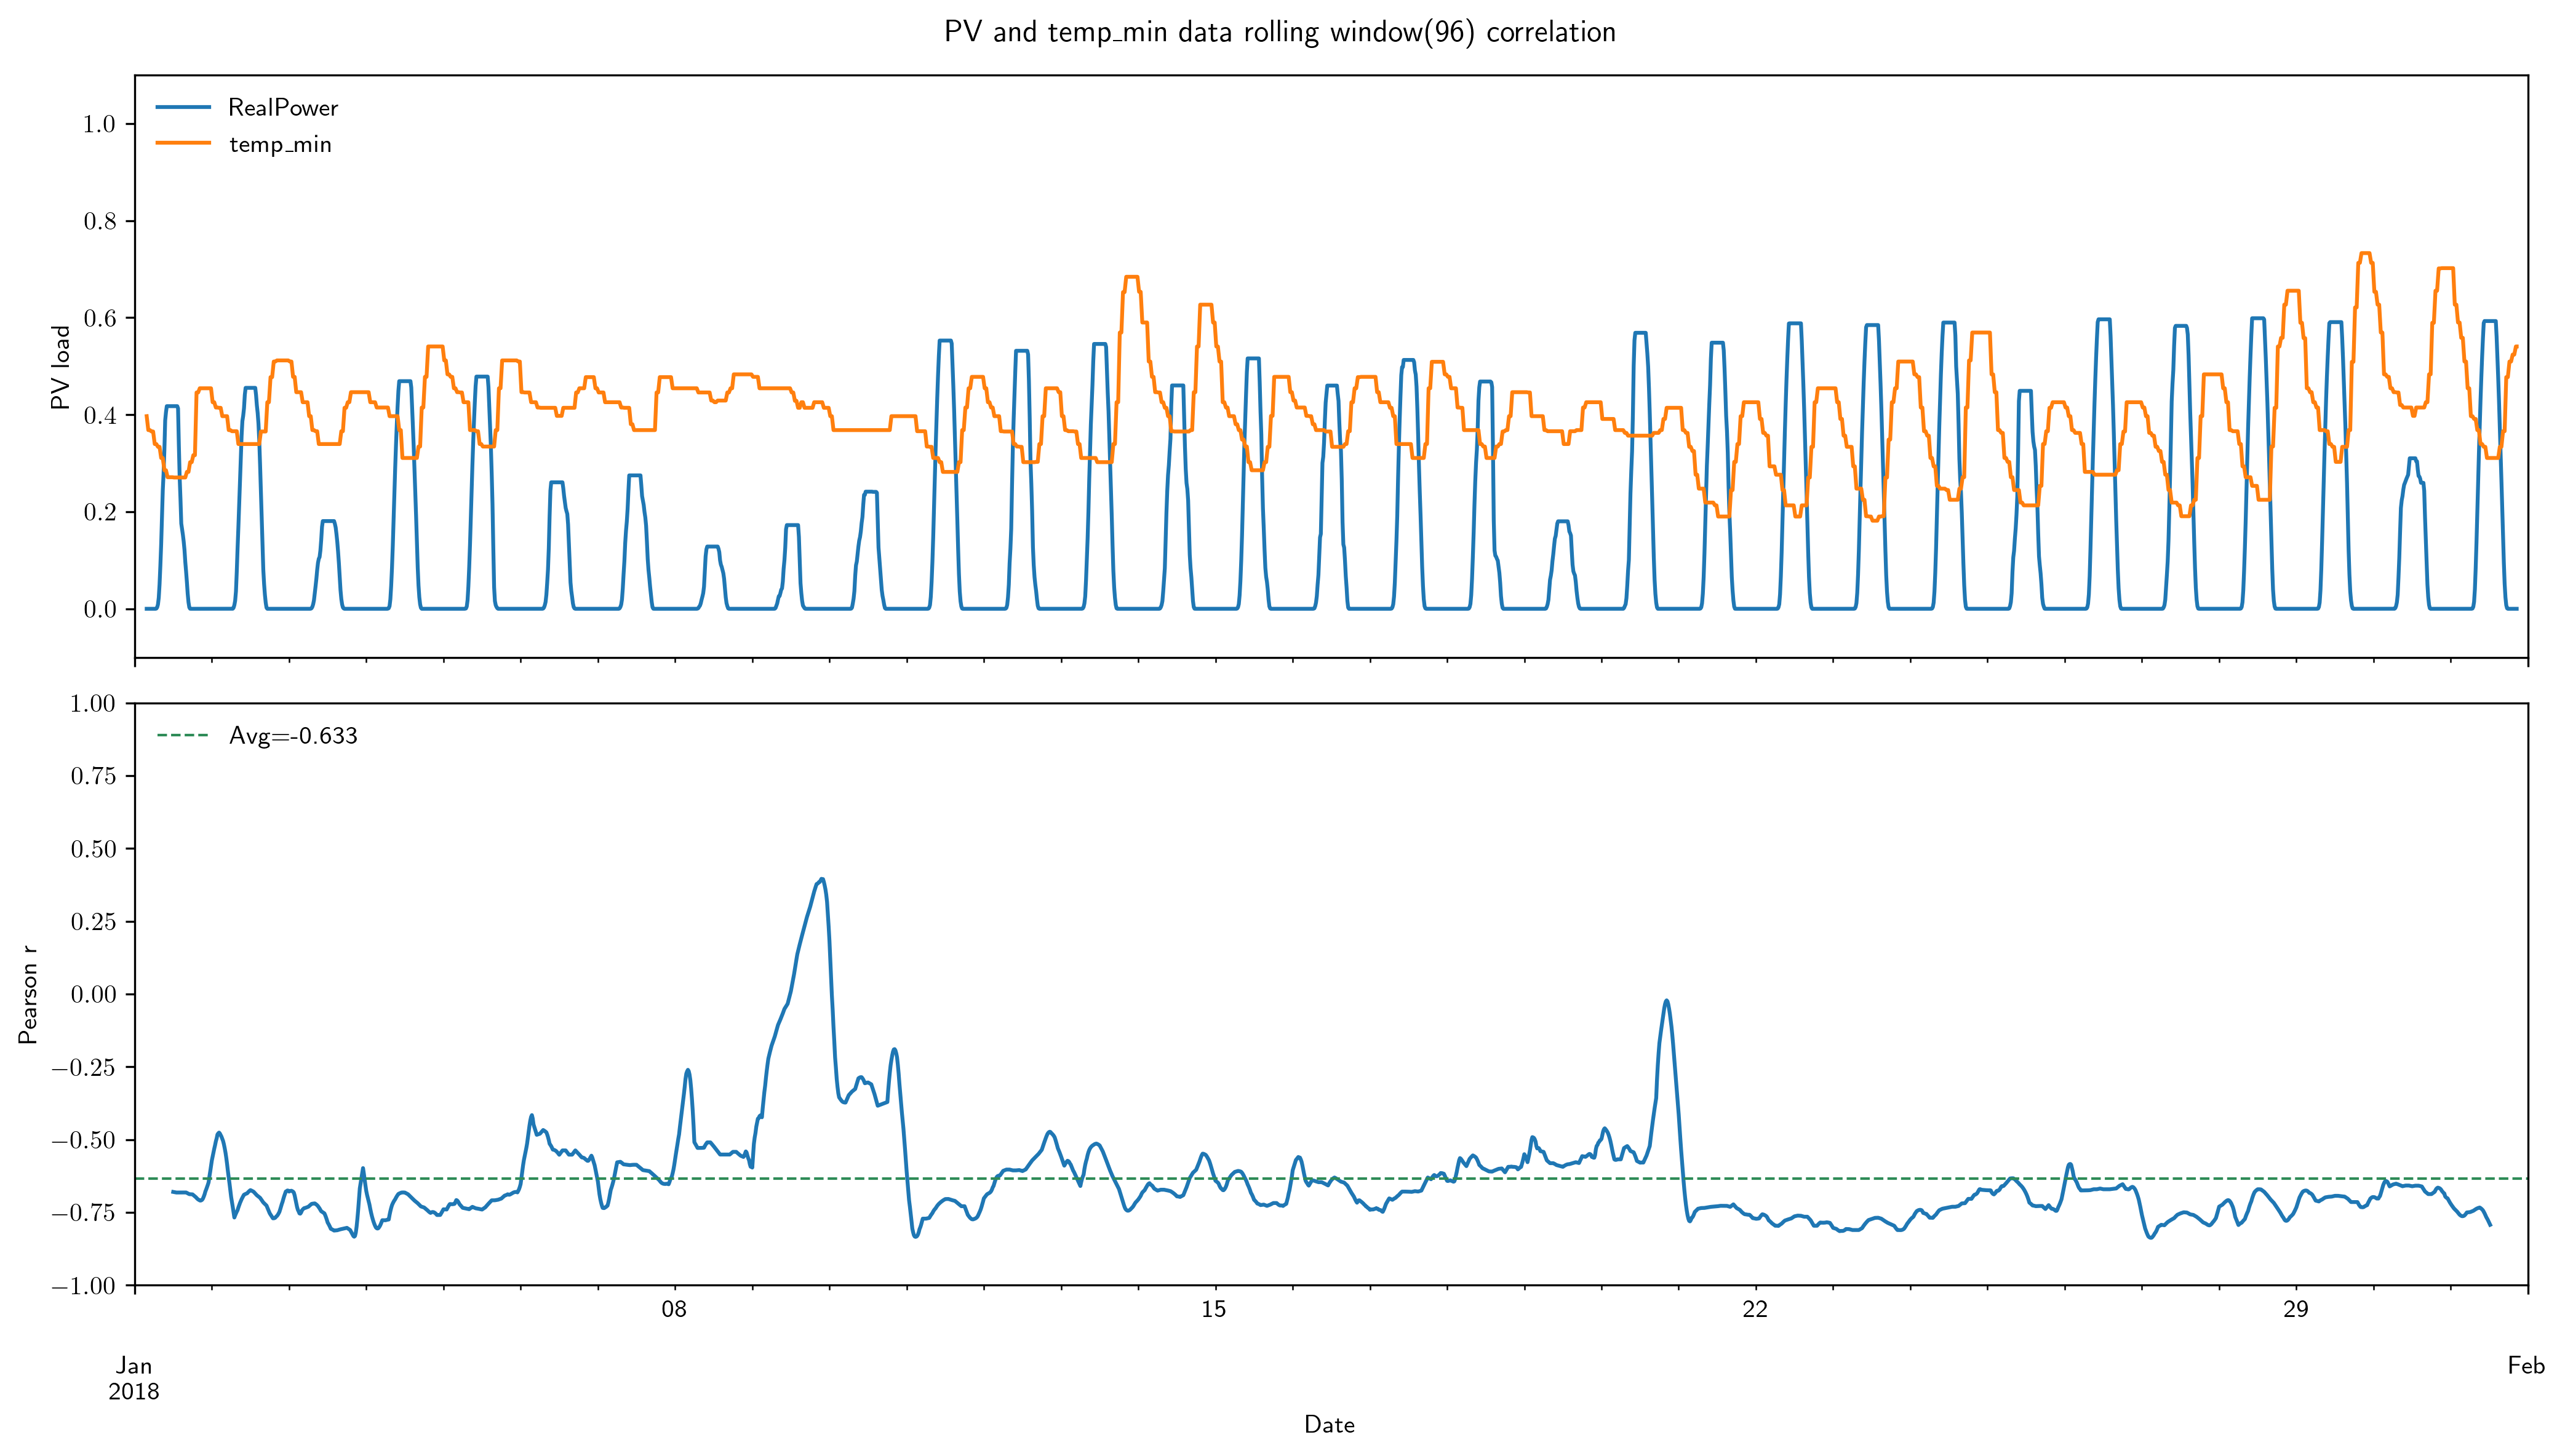

-0.6111455573516514


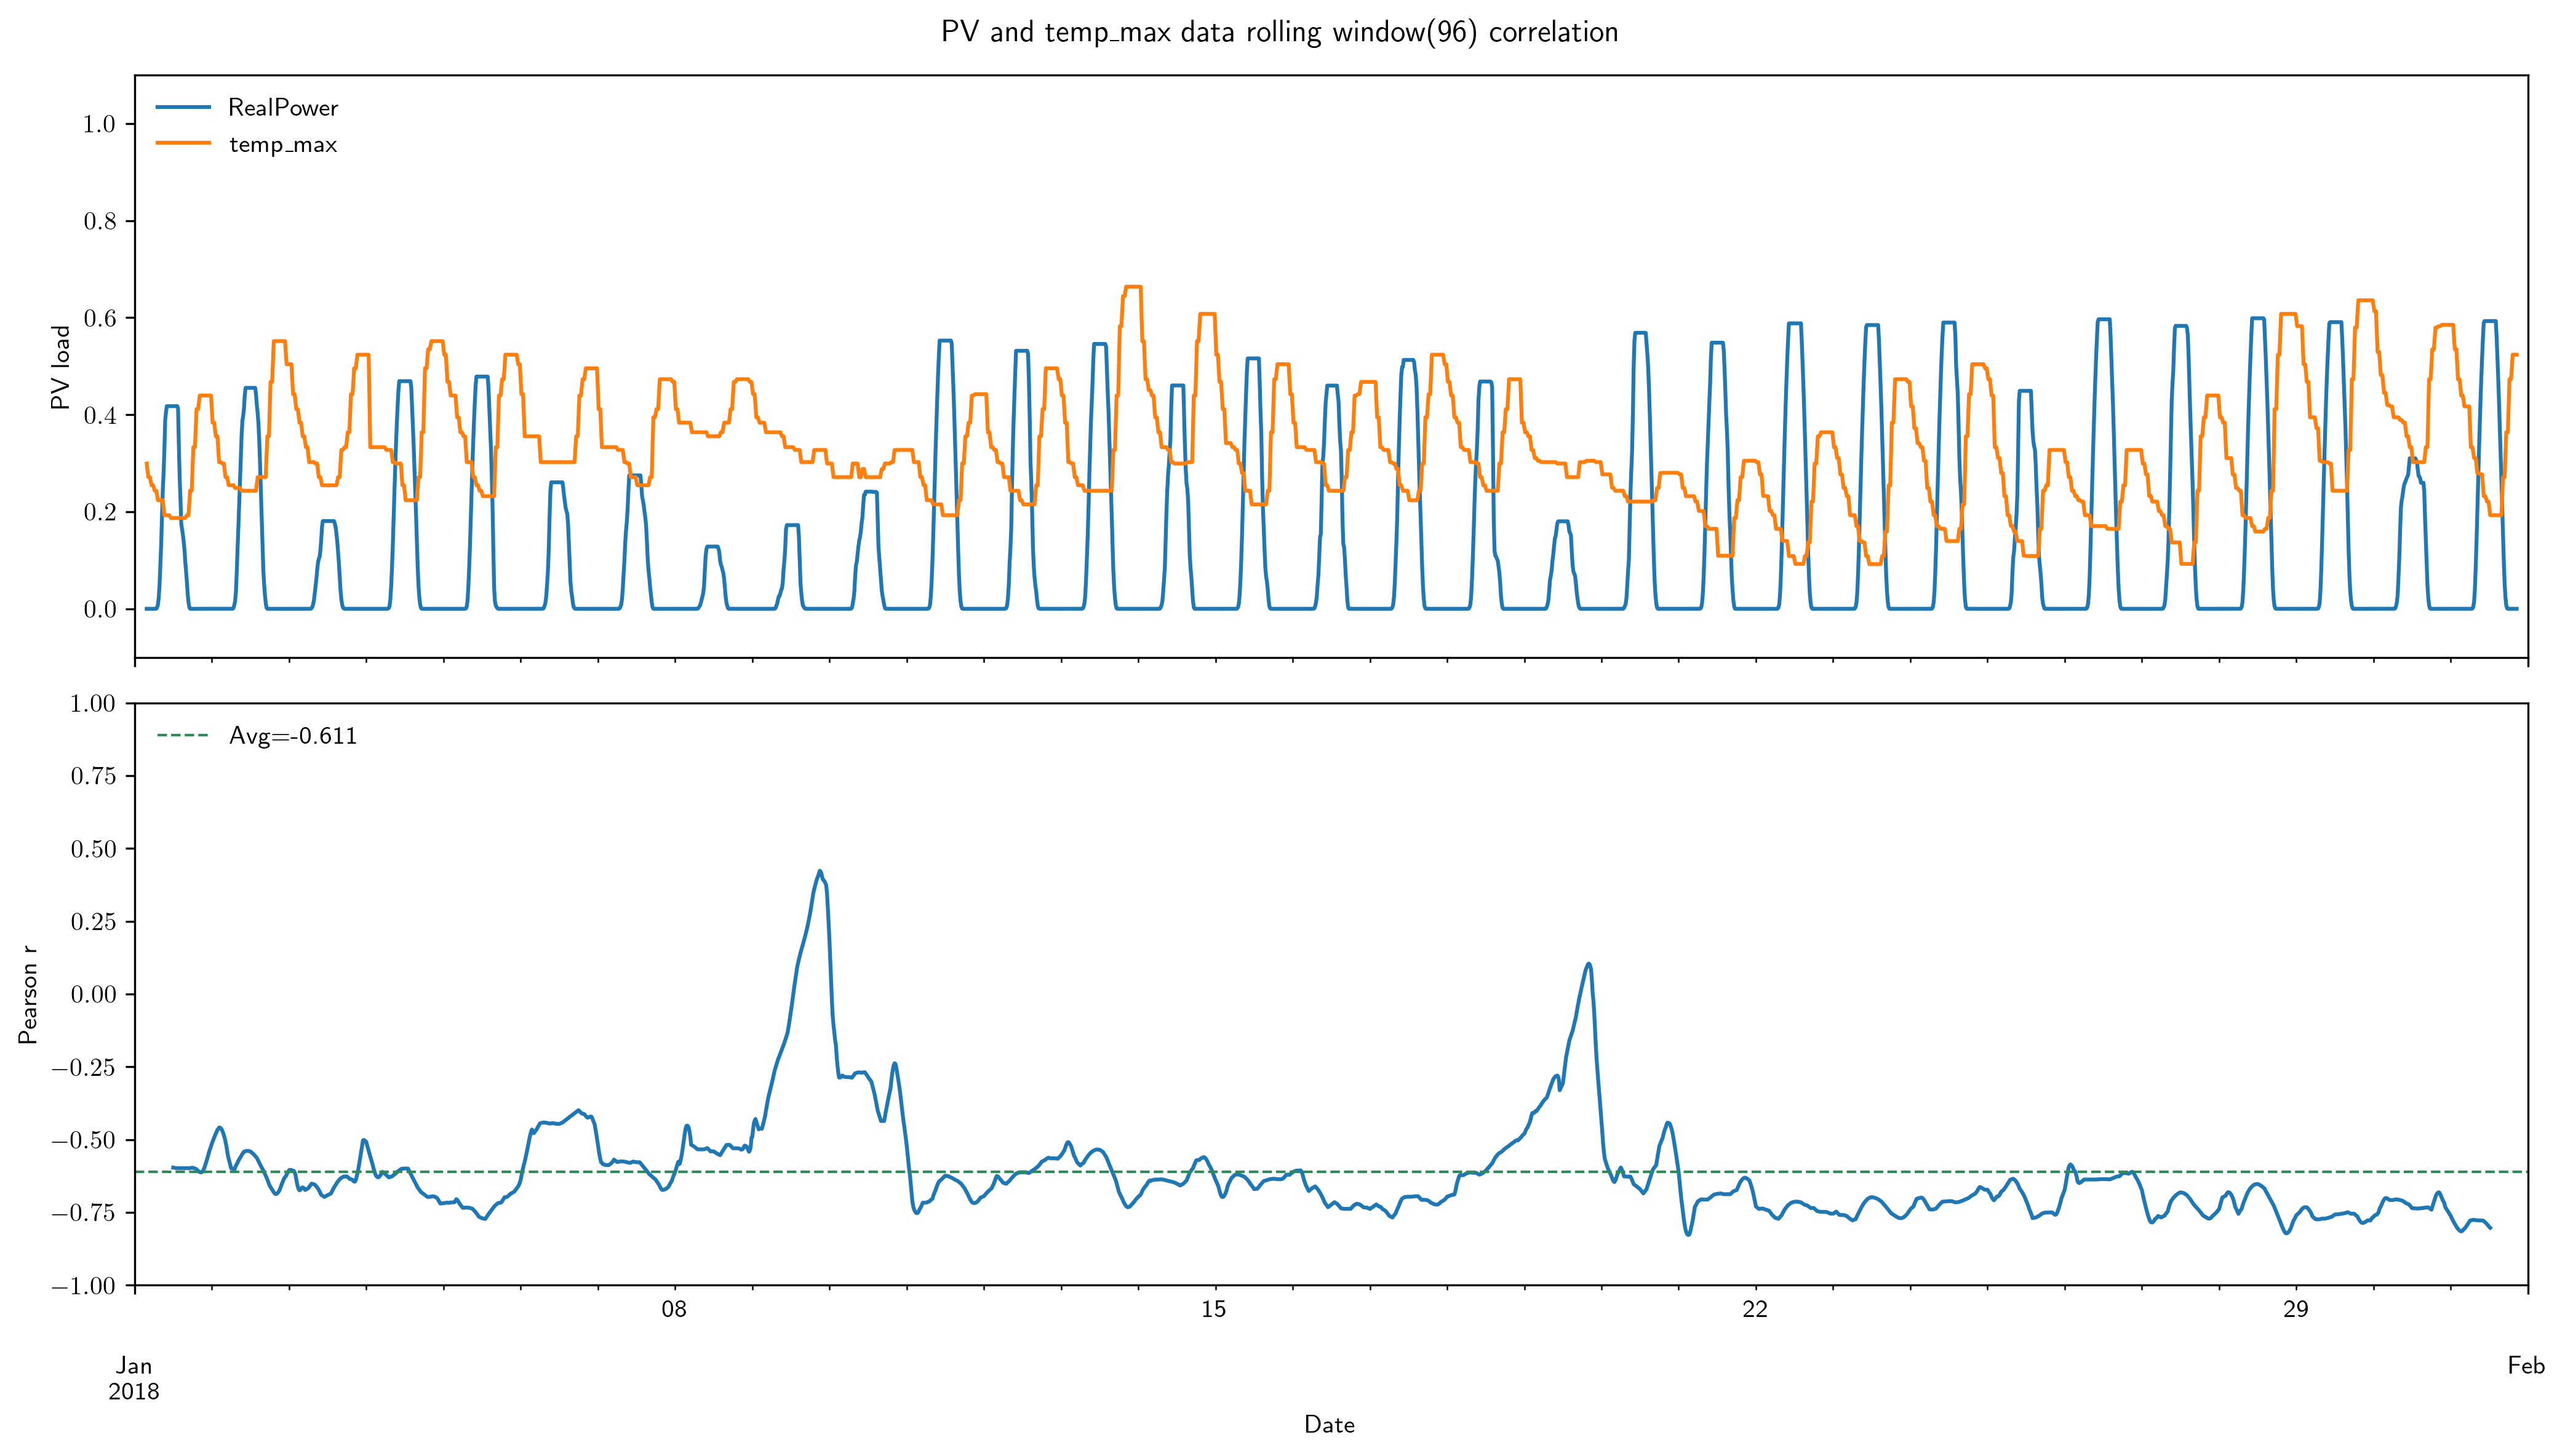

-0.6351070235067249


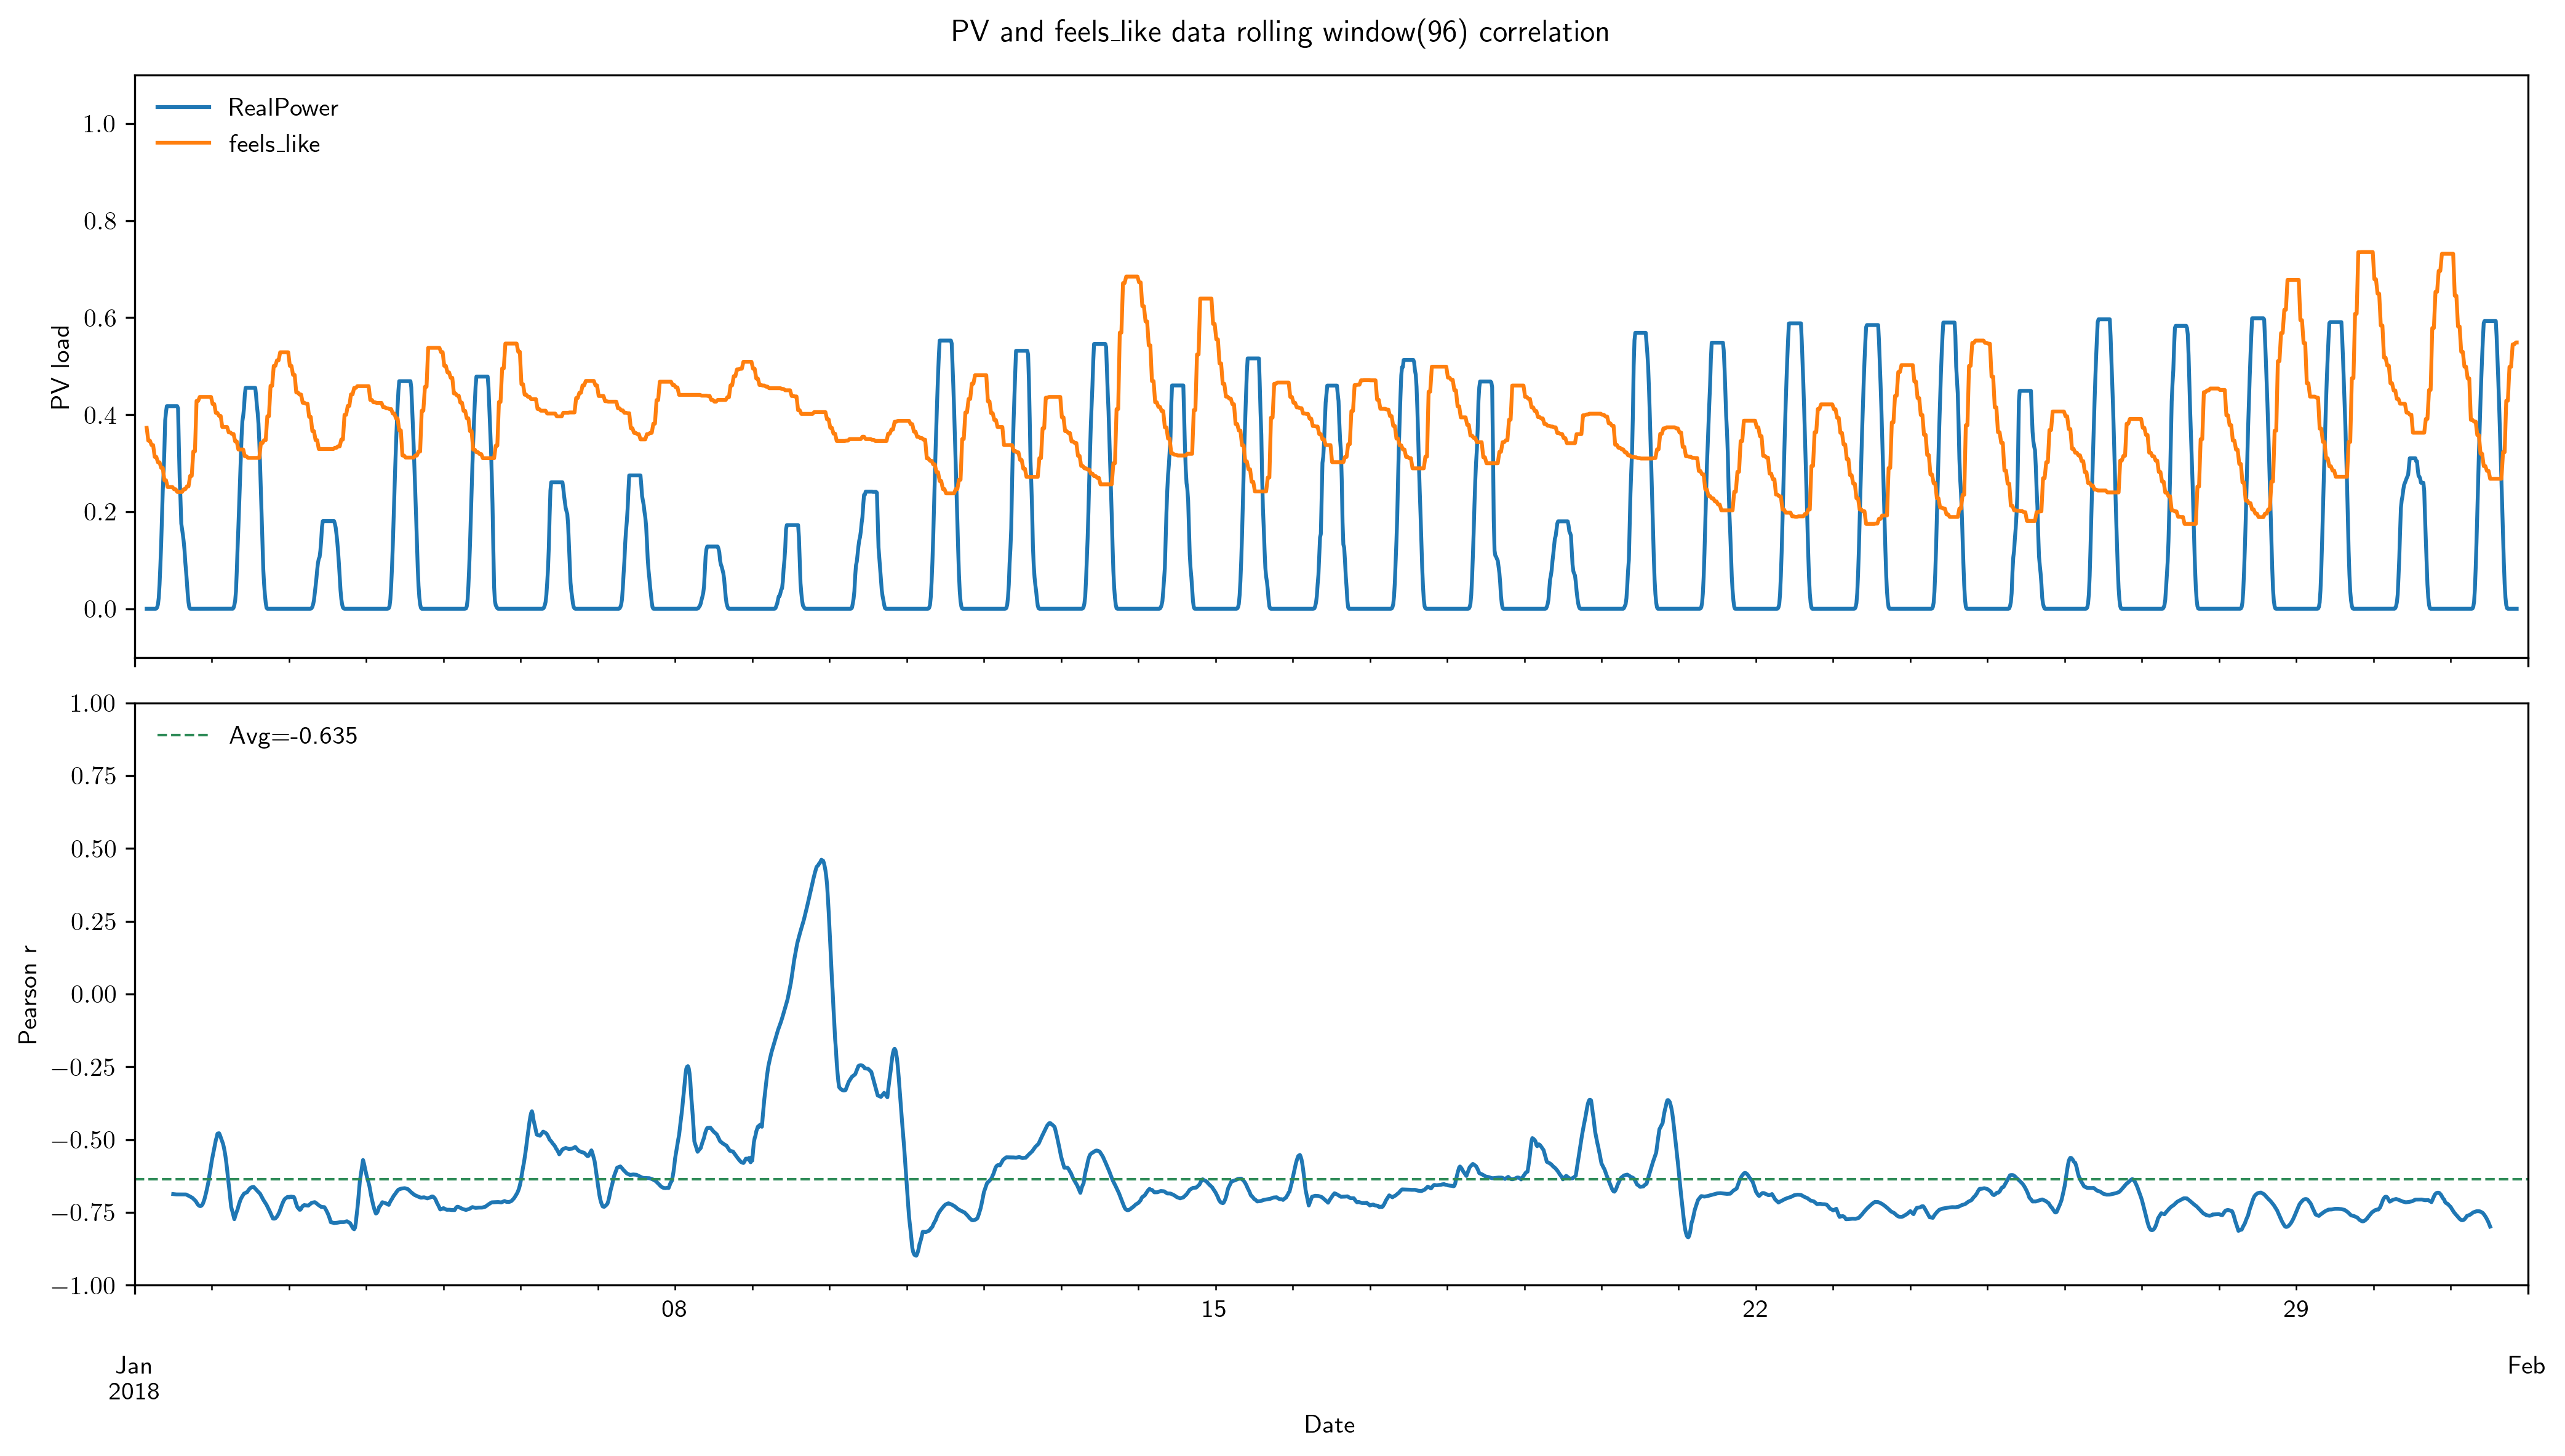

inf


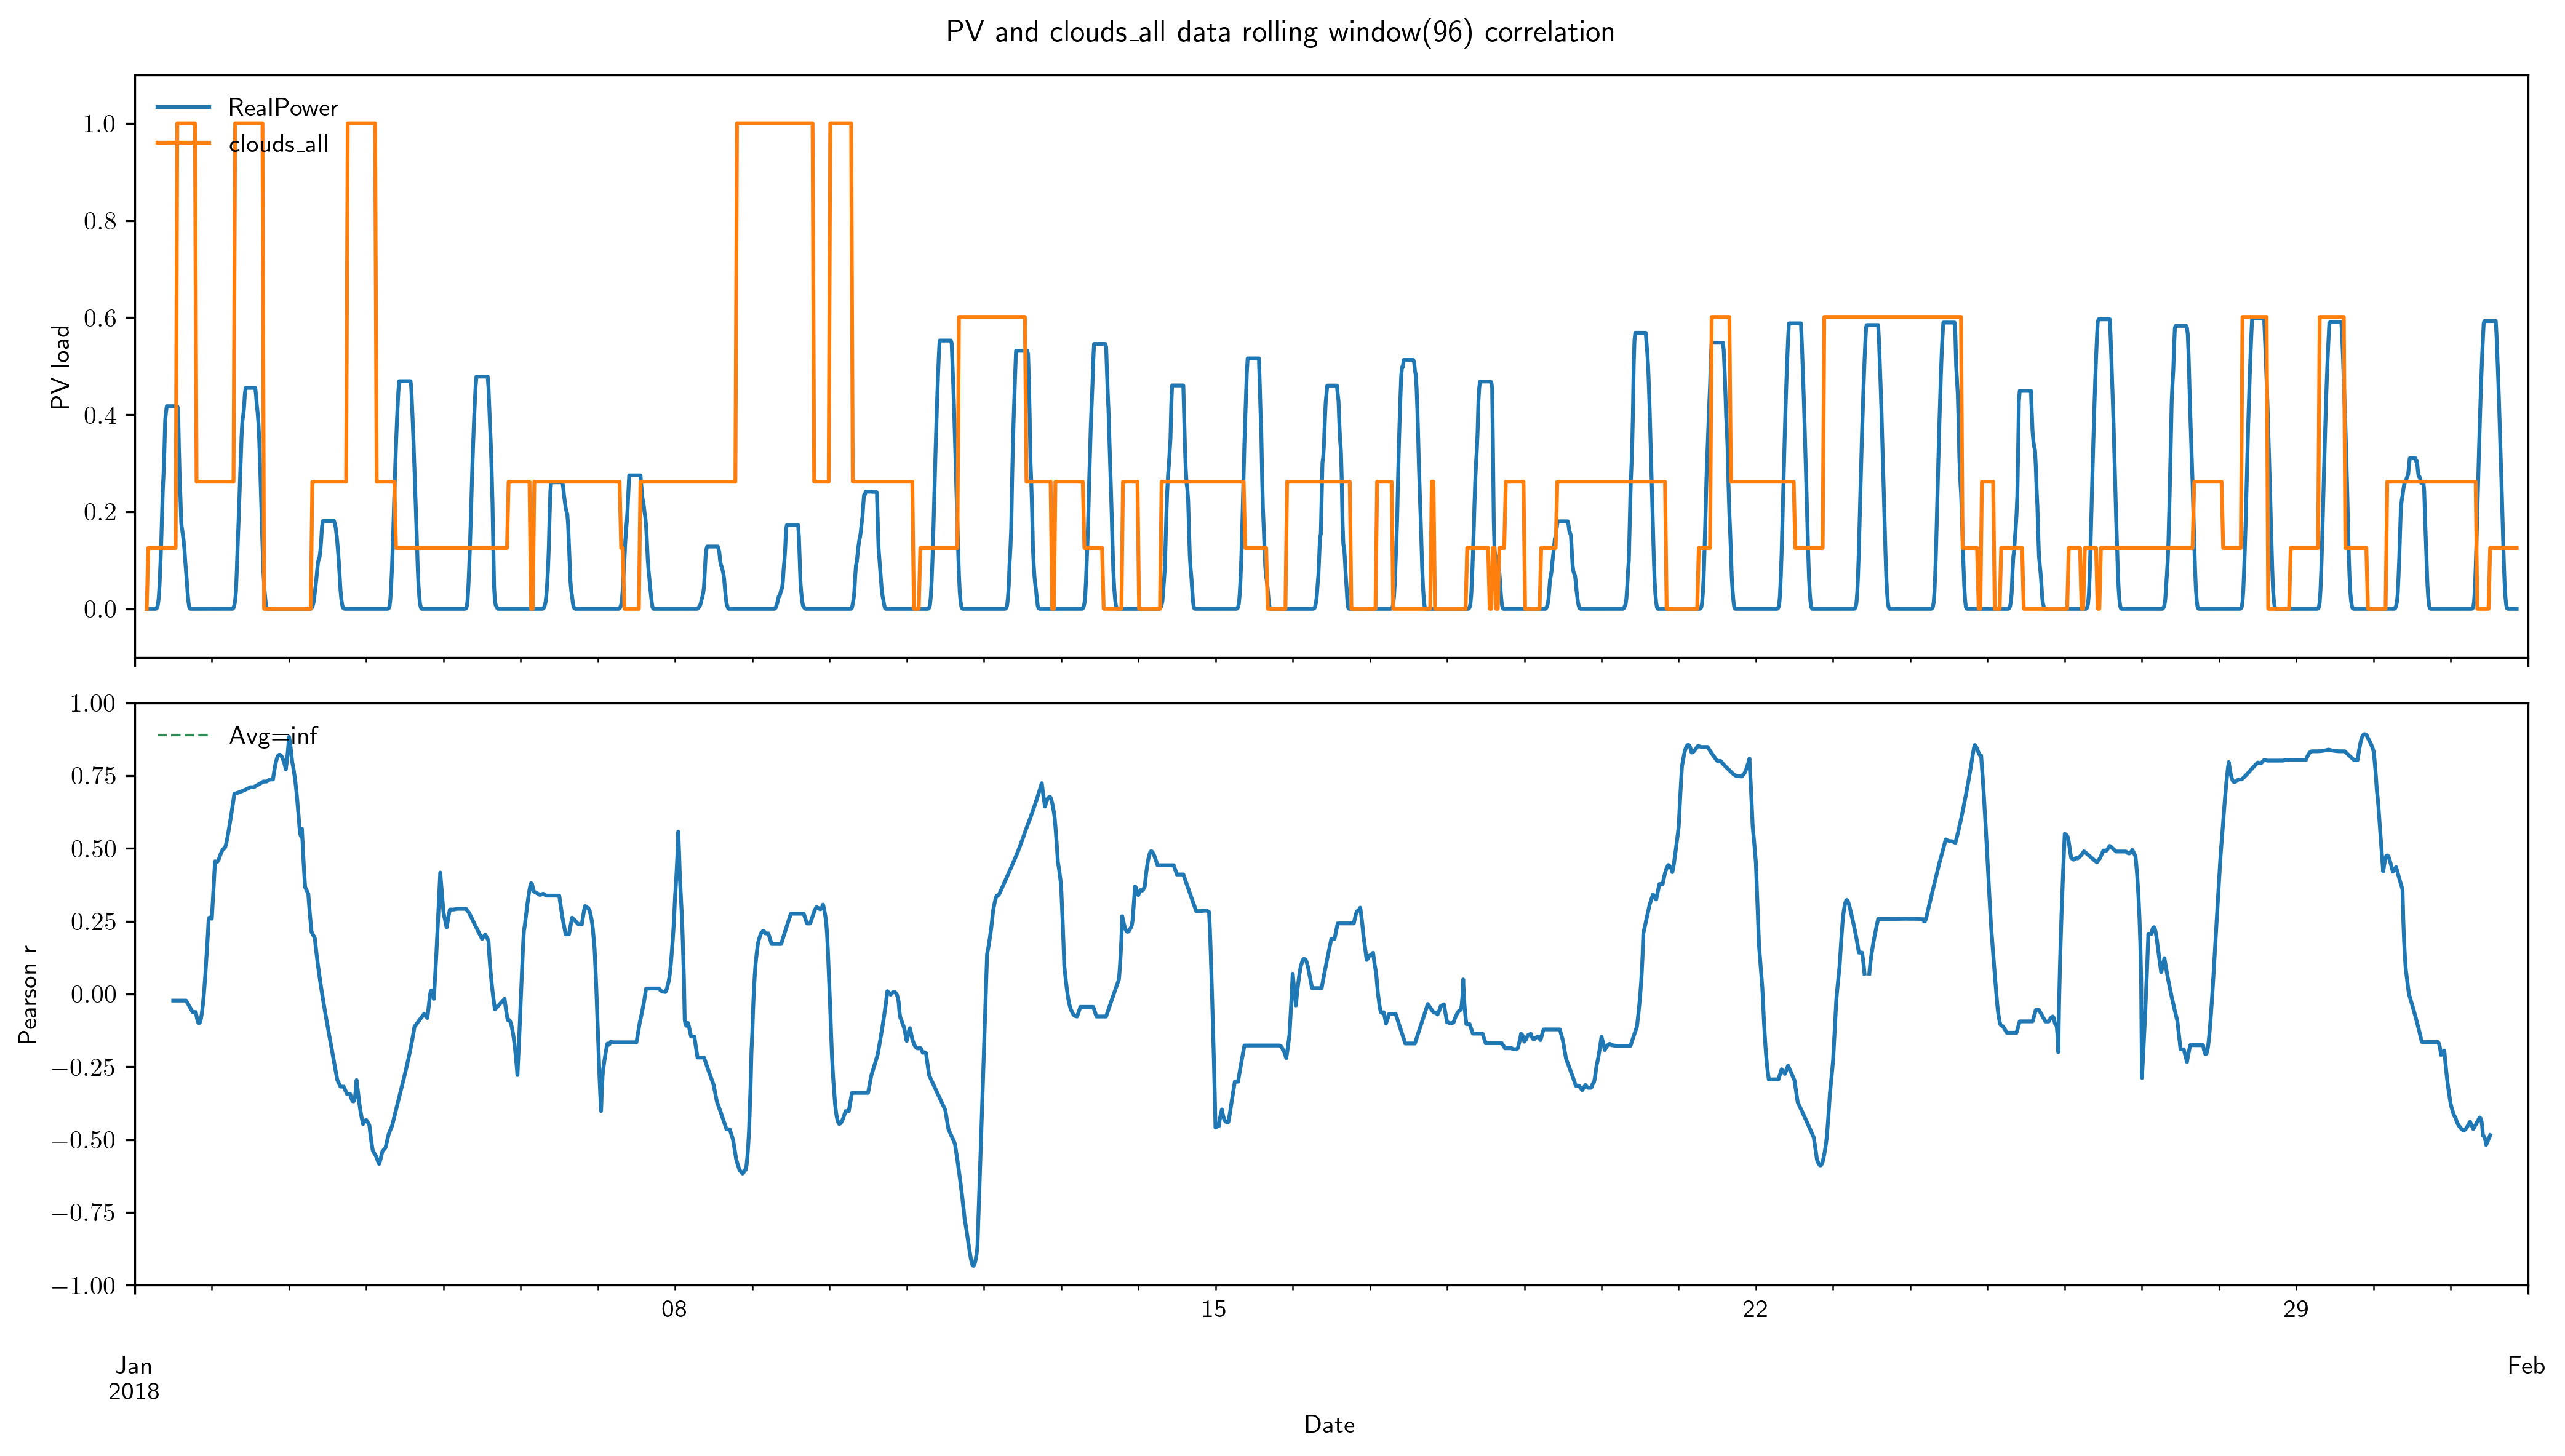

nan


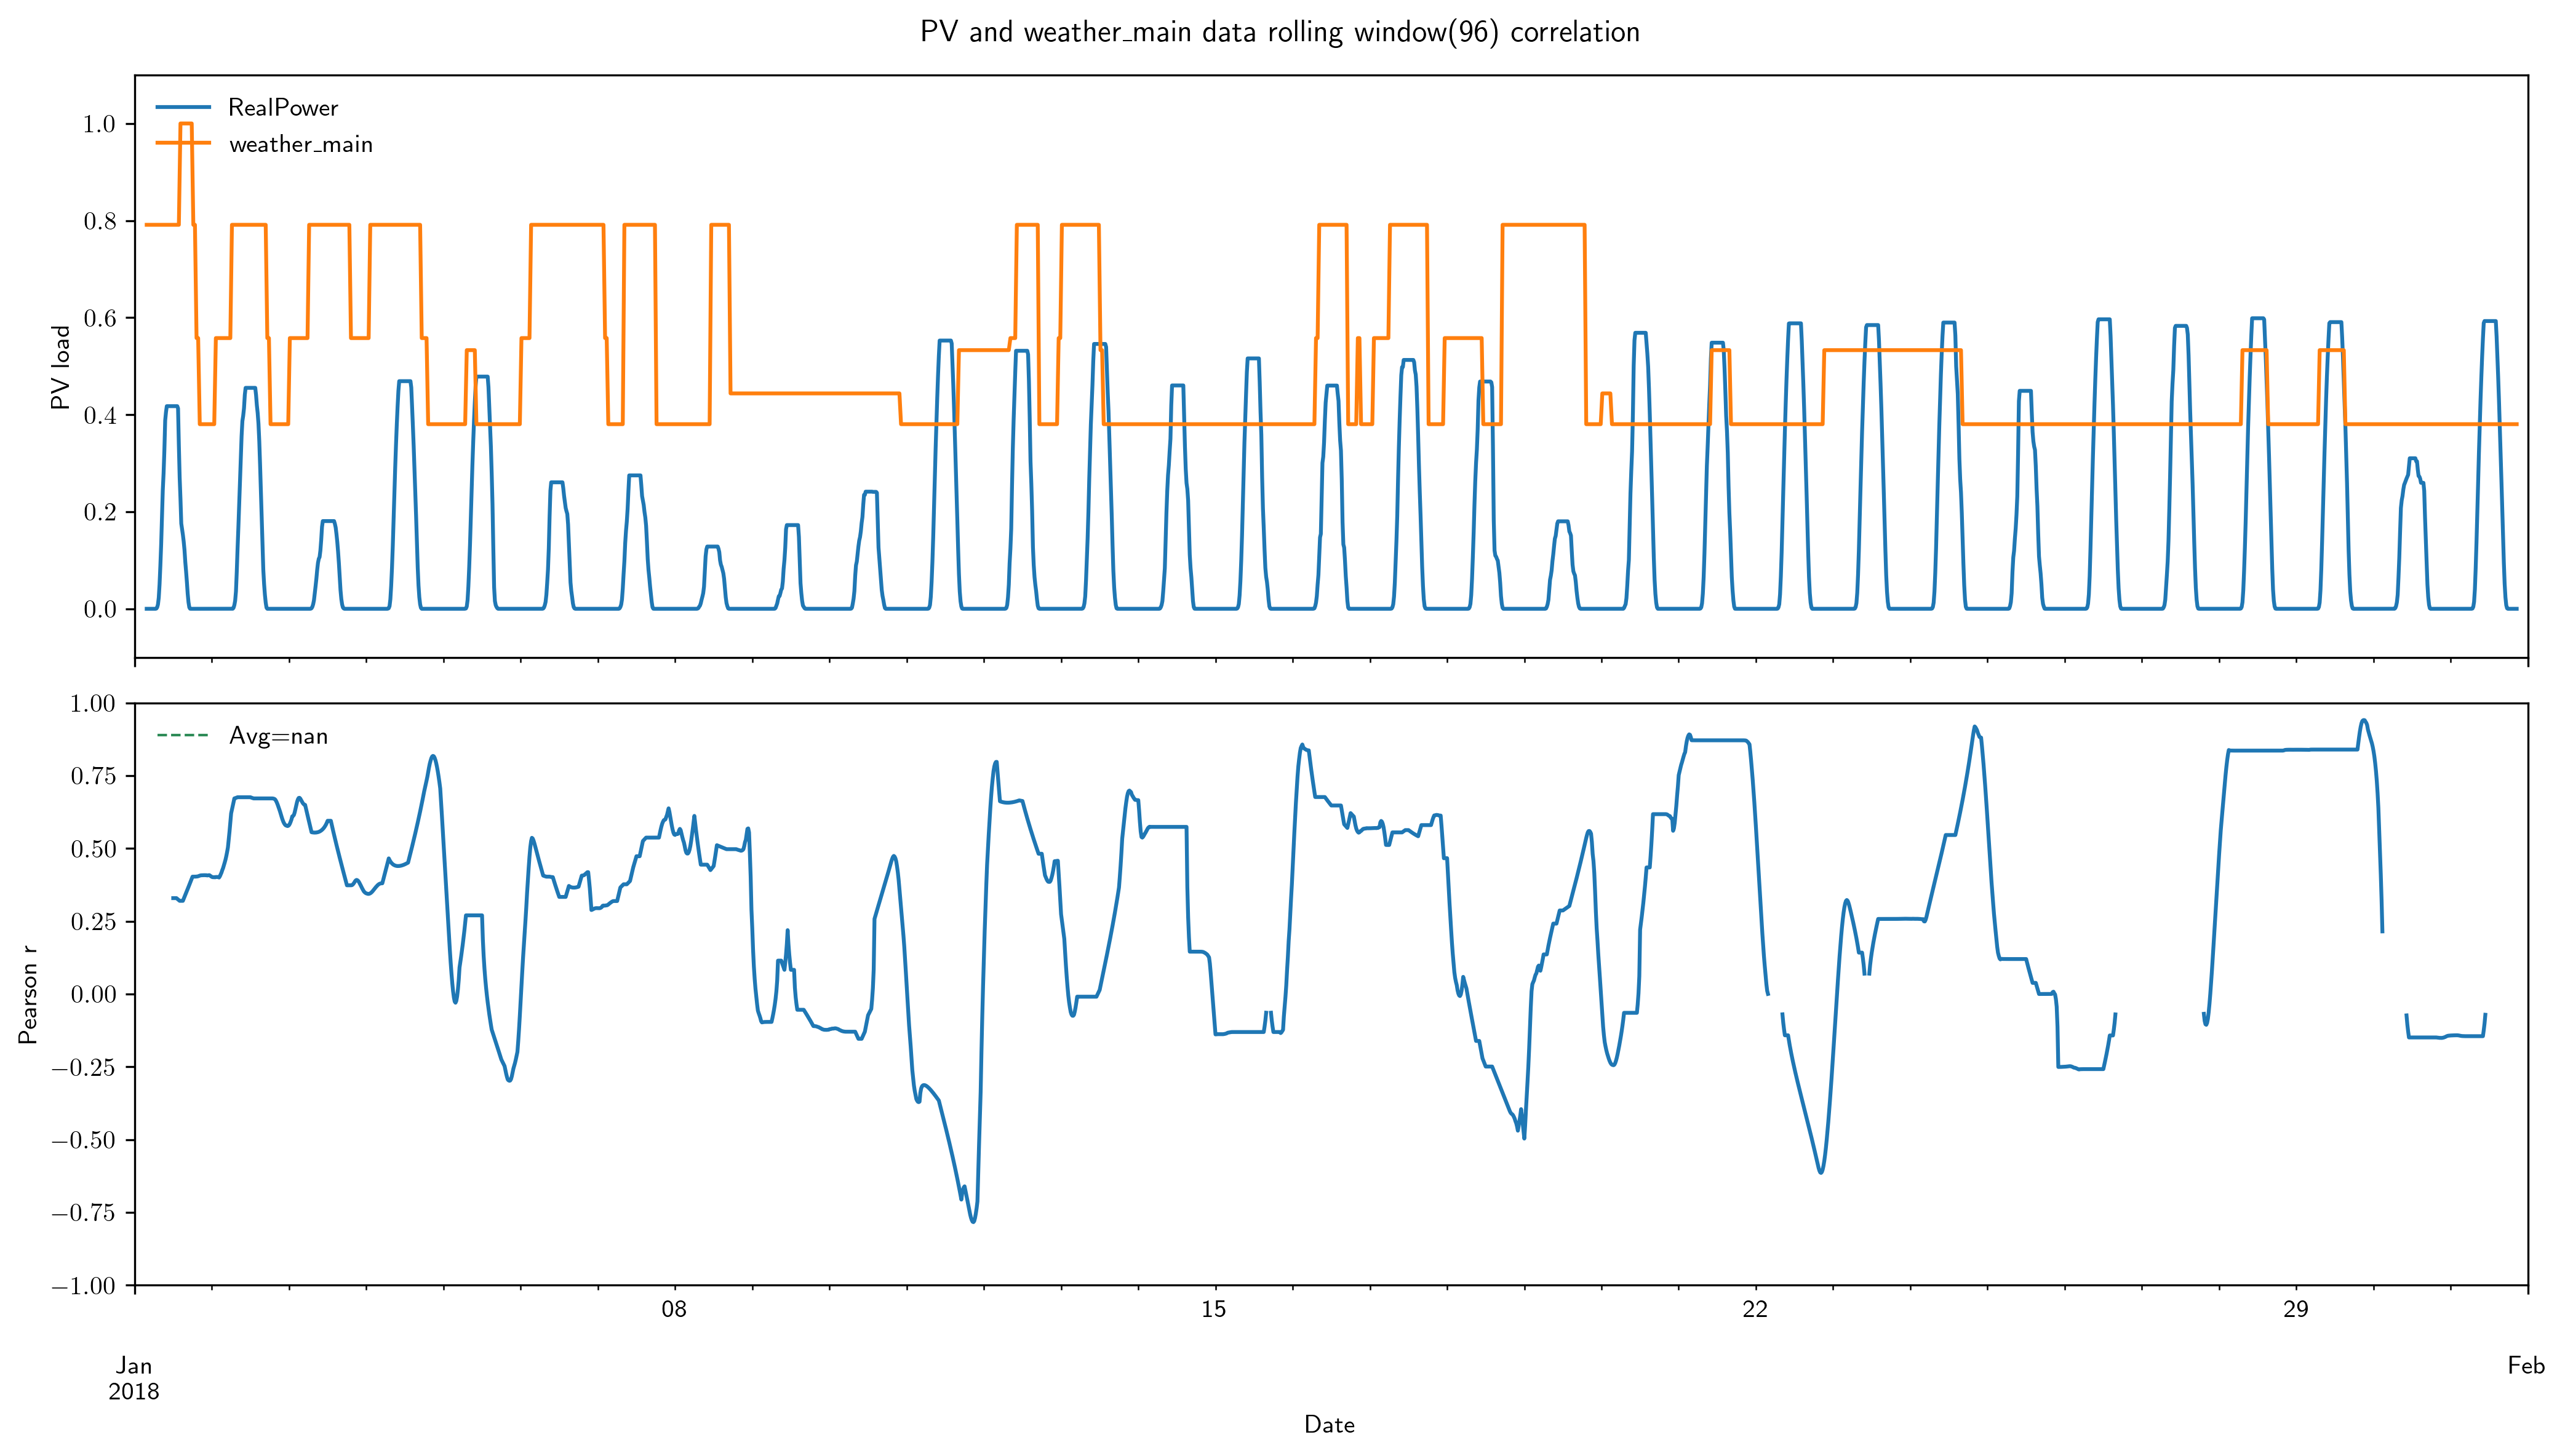

In [120]:
tstart=pd.to_datetime('2018-01-01')
tend=pd.to_datetime('2018-02-01')

key_list=['solar_zenith','temp','temp_min','temp_max','feels_like','clouds_all','weather_main']

for key in key_list:
    person_moving_window(
        df_norm,
        key,
        tstart,
        tend,
        96
    )

0.35751471821938086


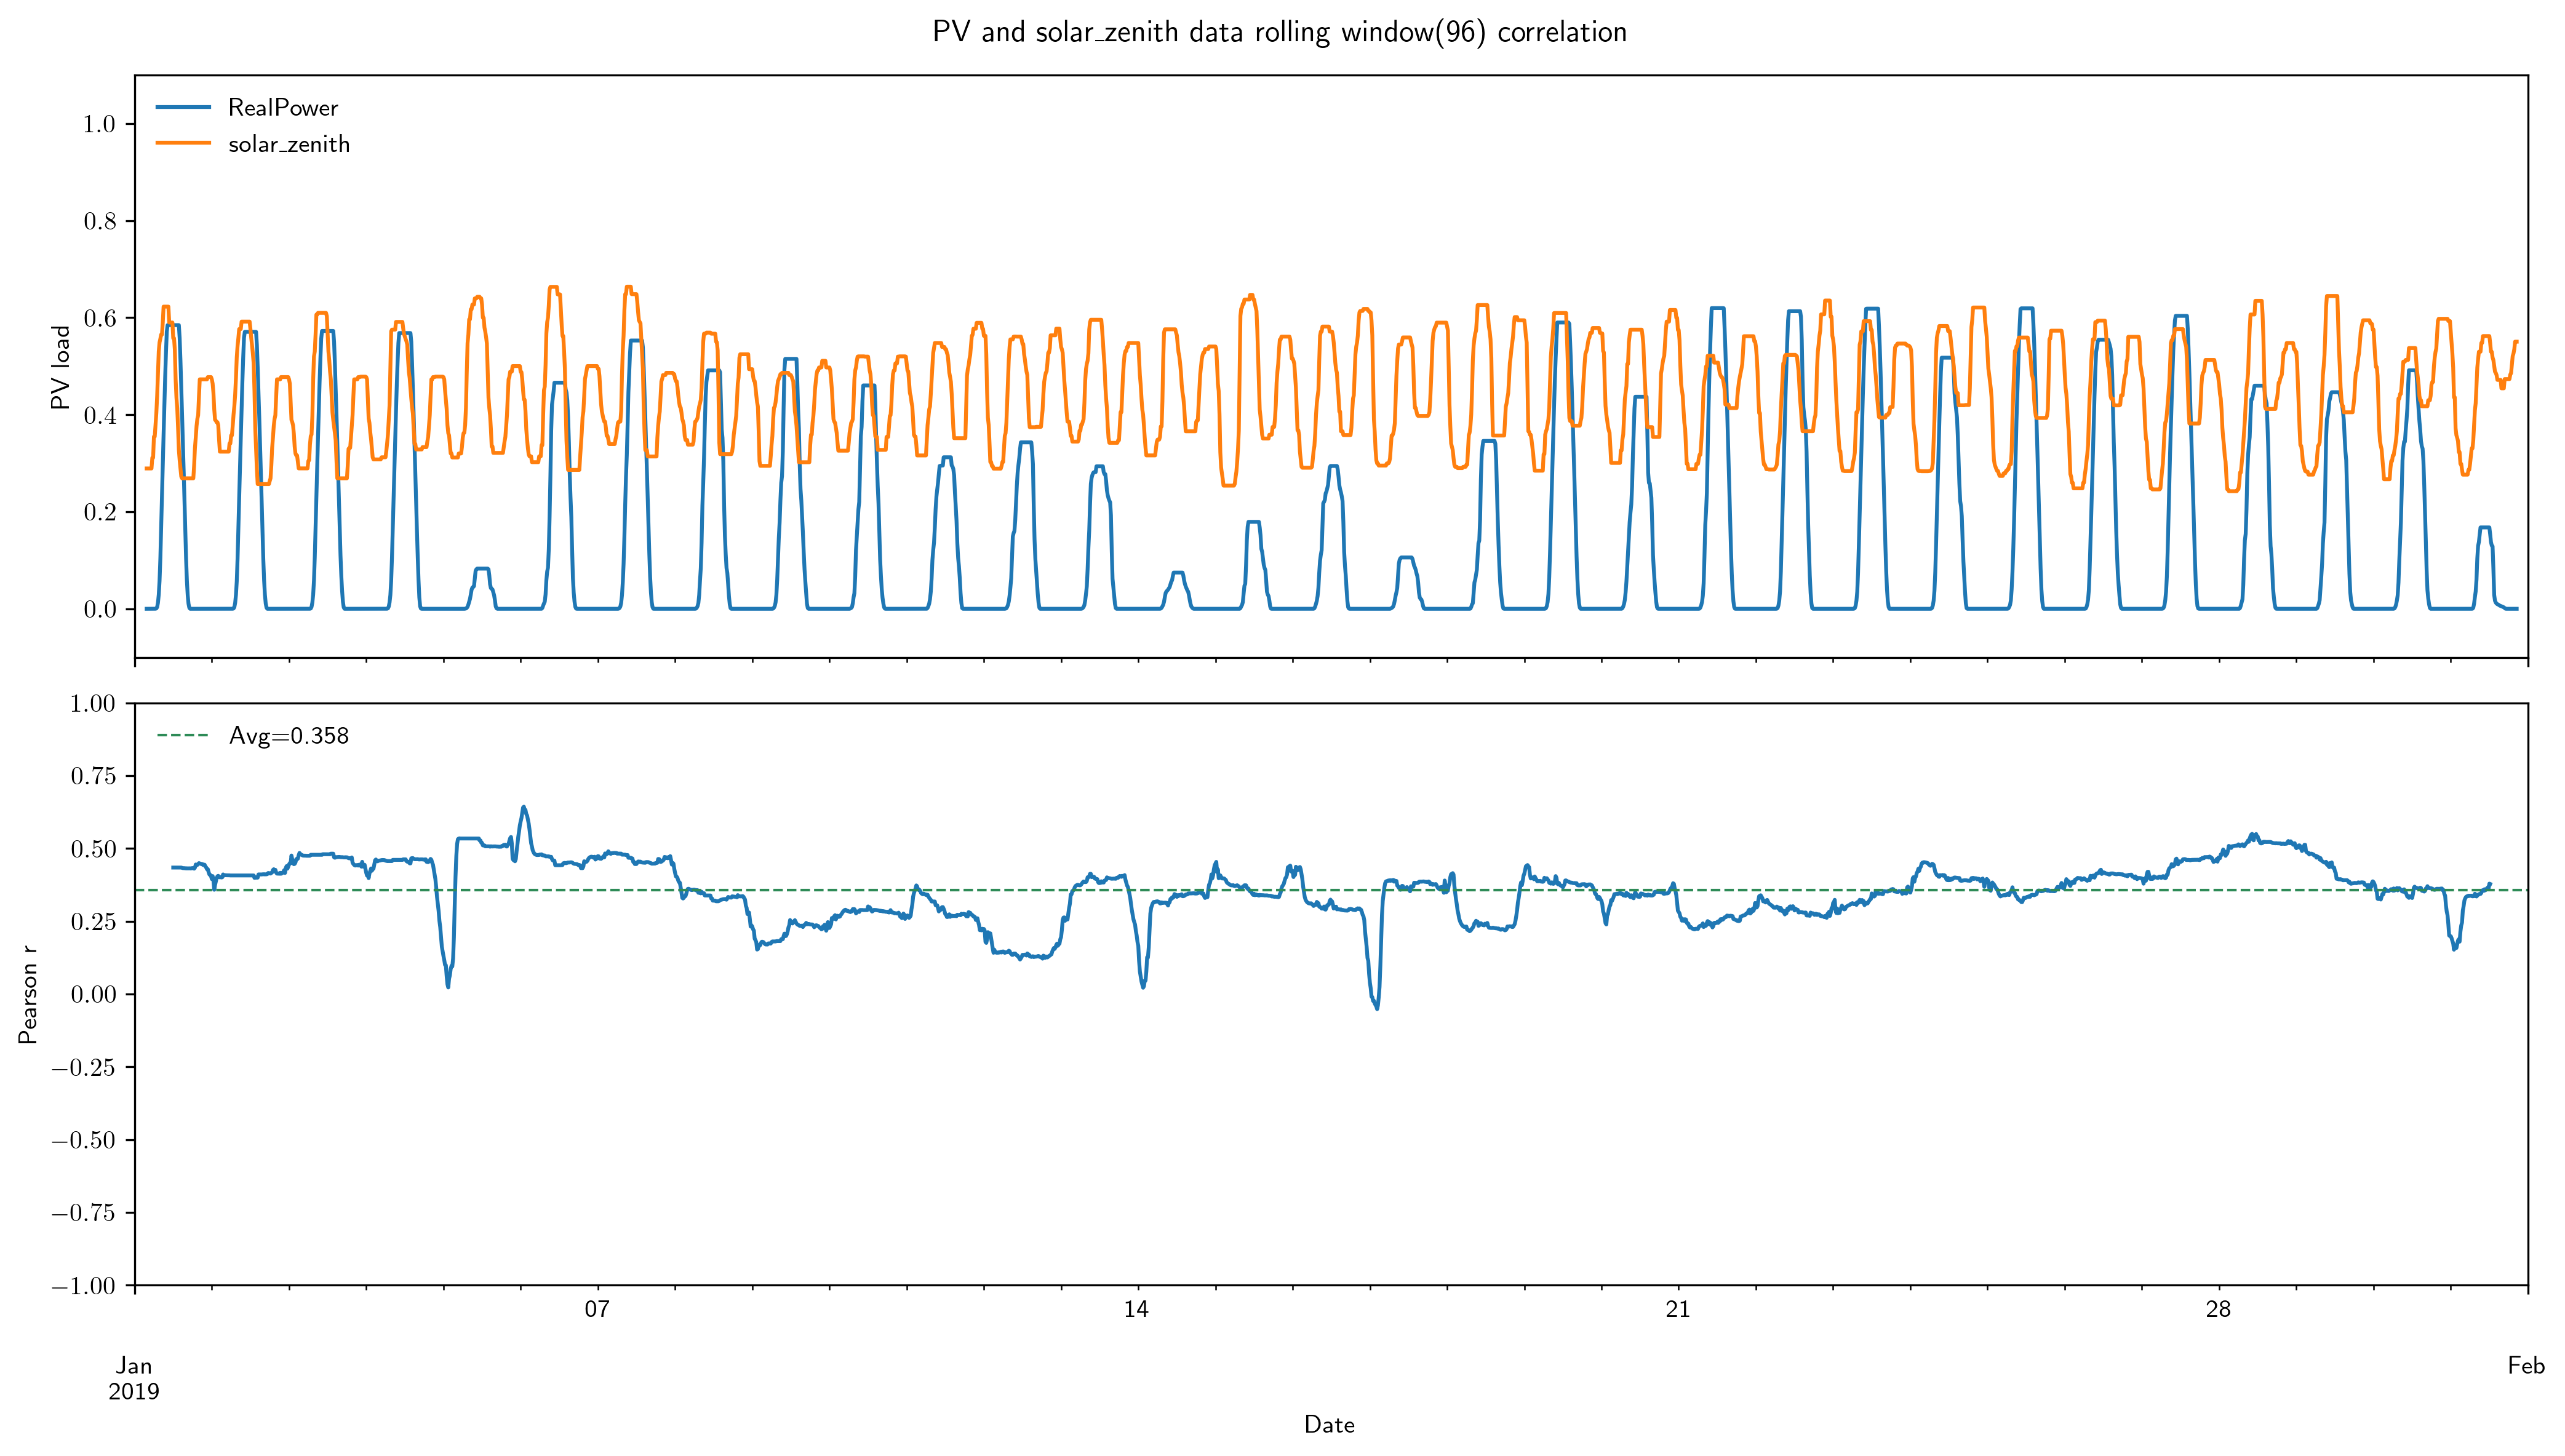

-0.6244546187249608


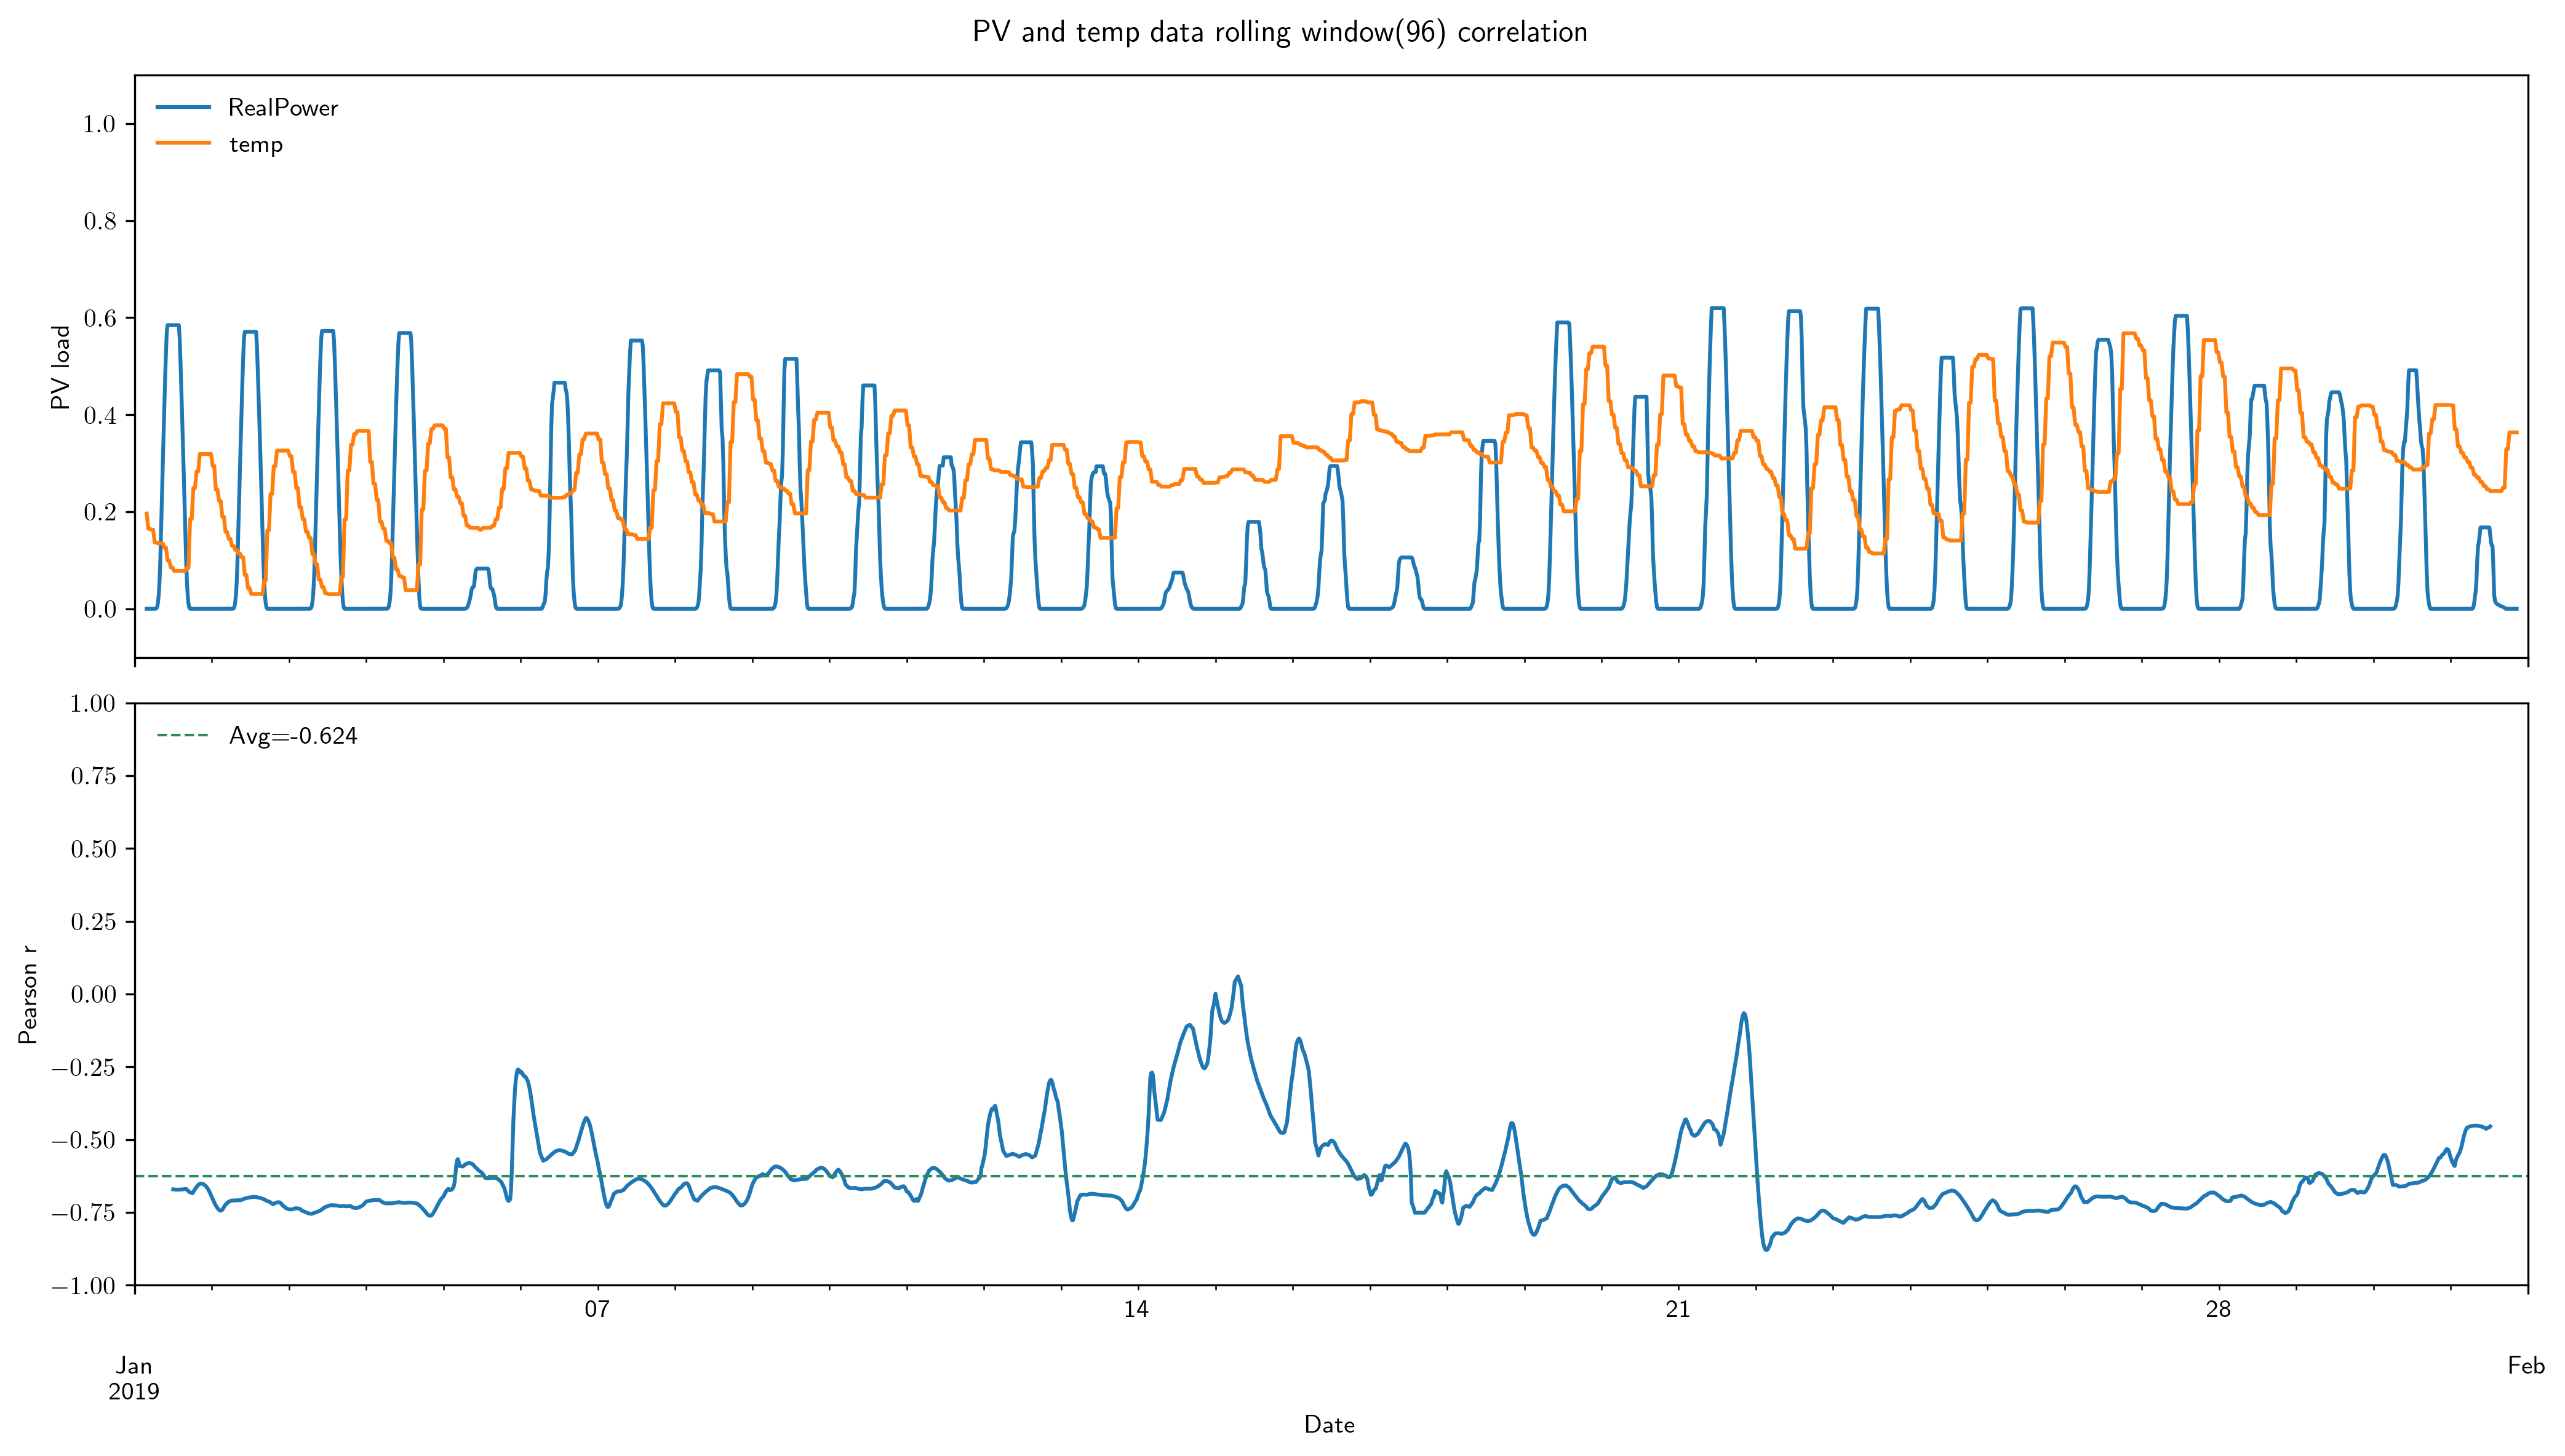

-0.6371590700082339


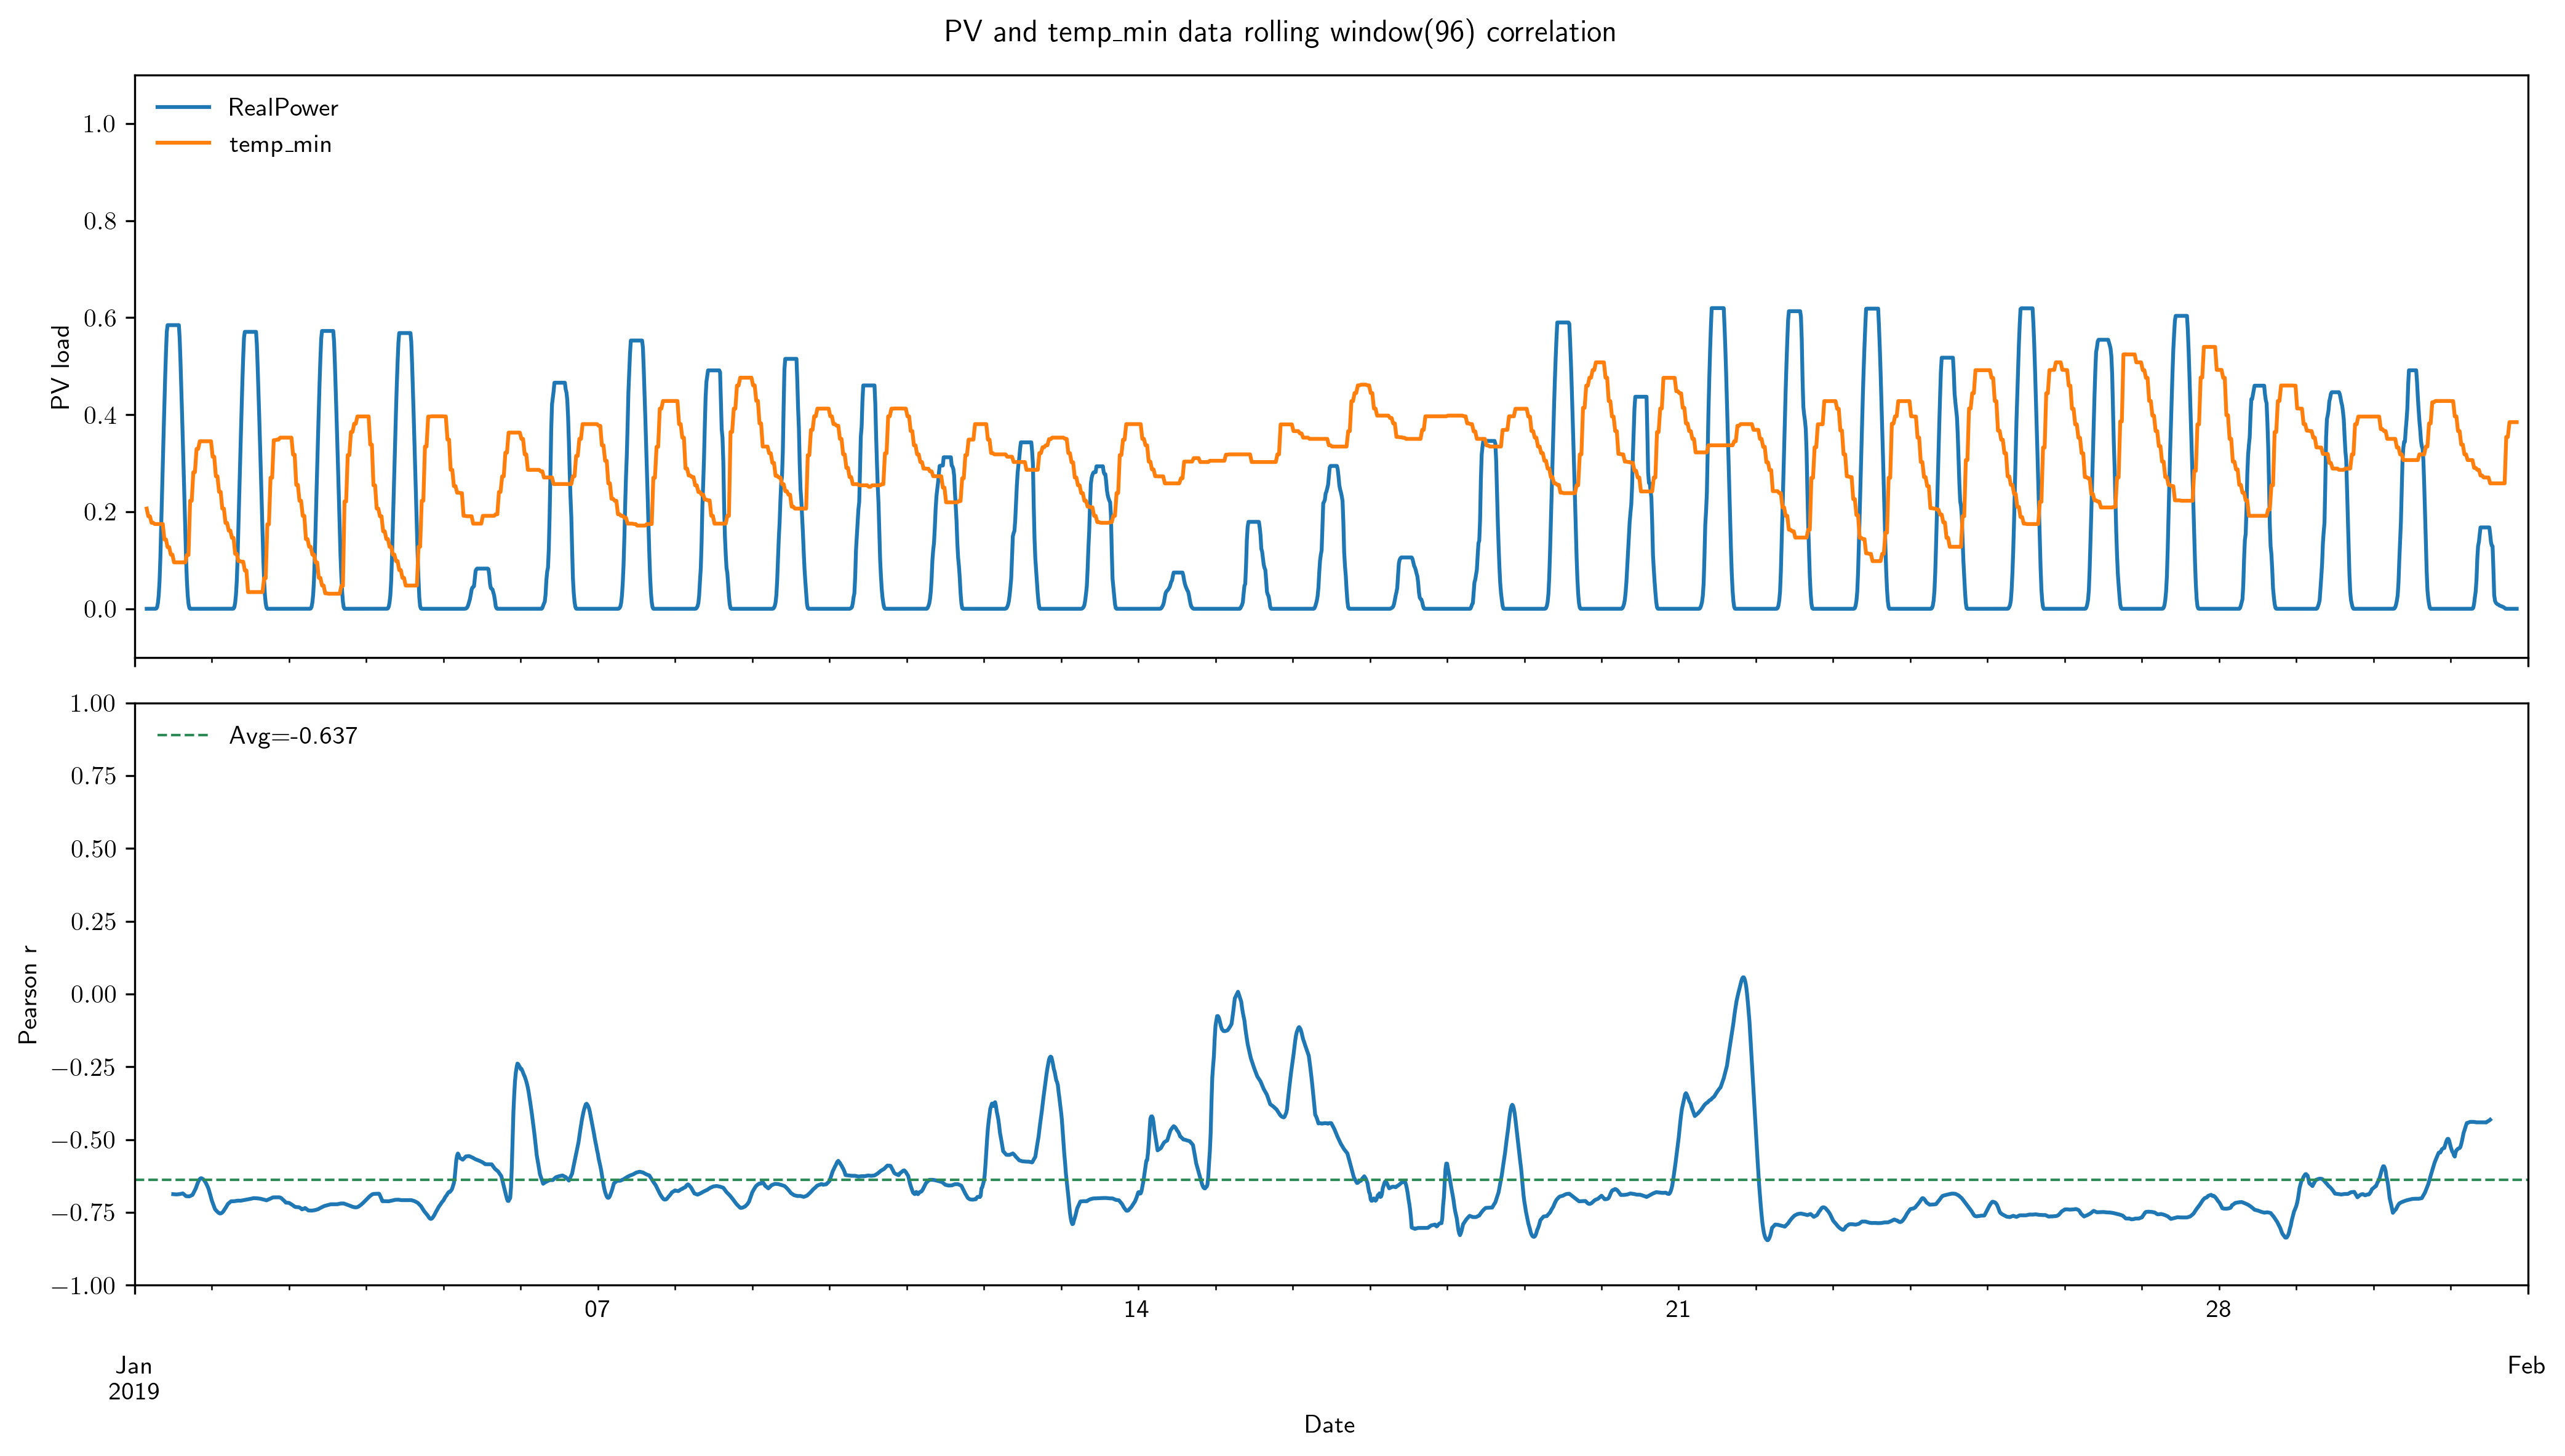

-0.5906849416406126


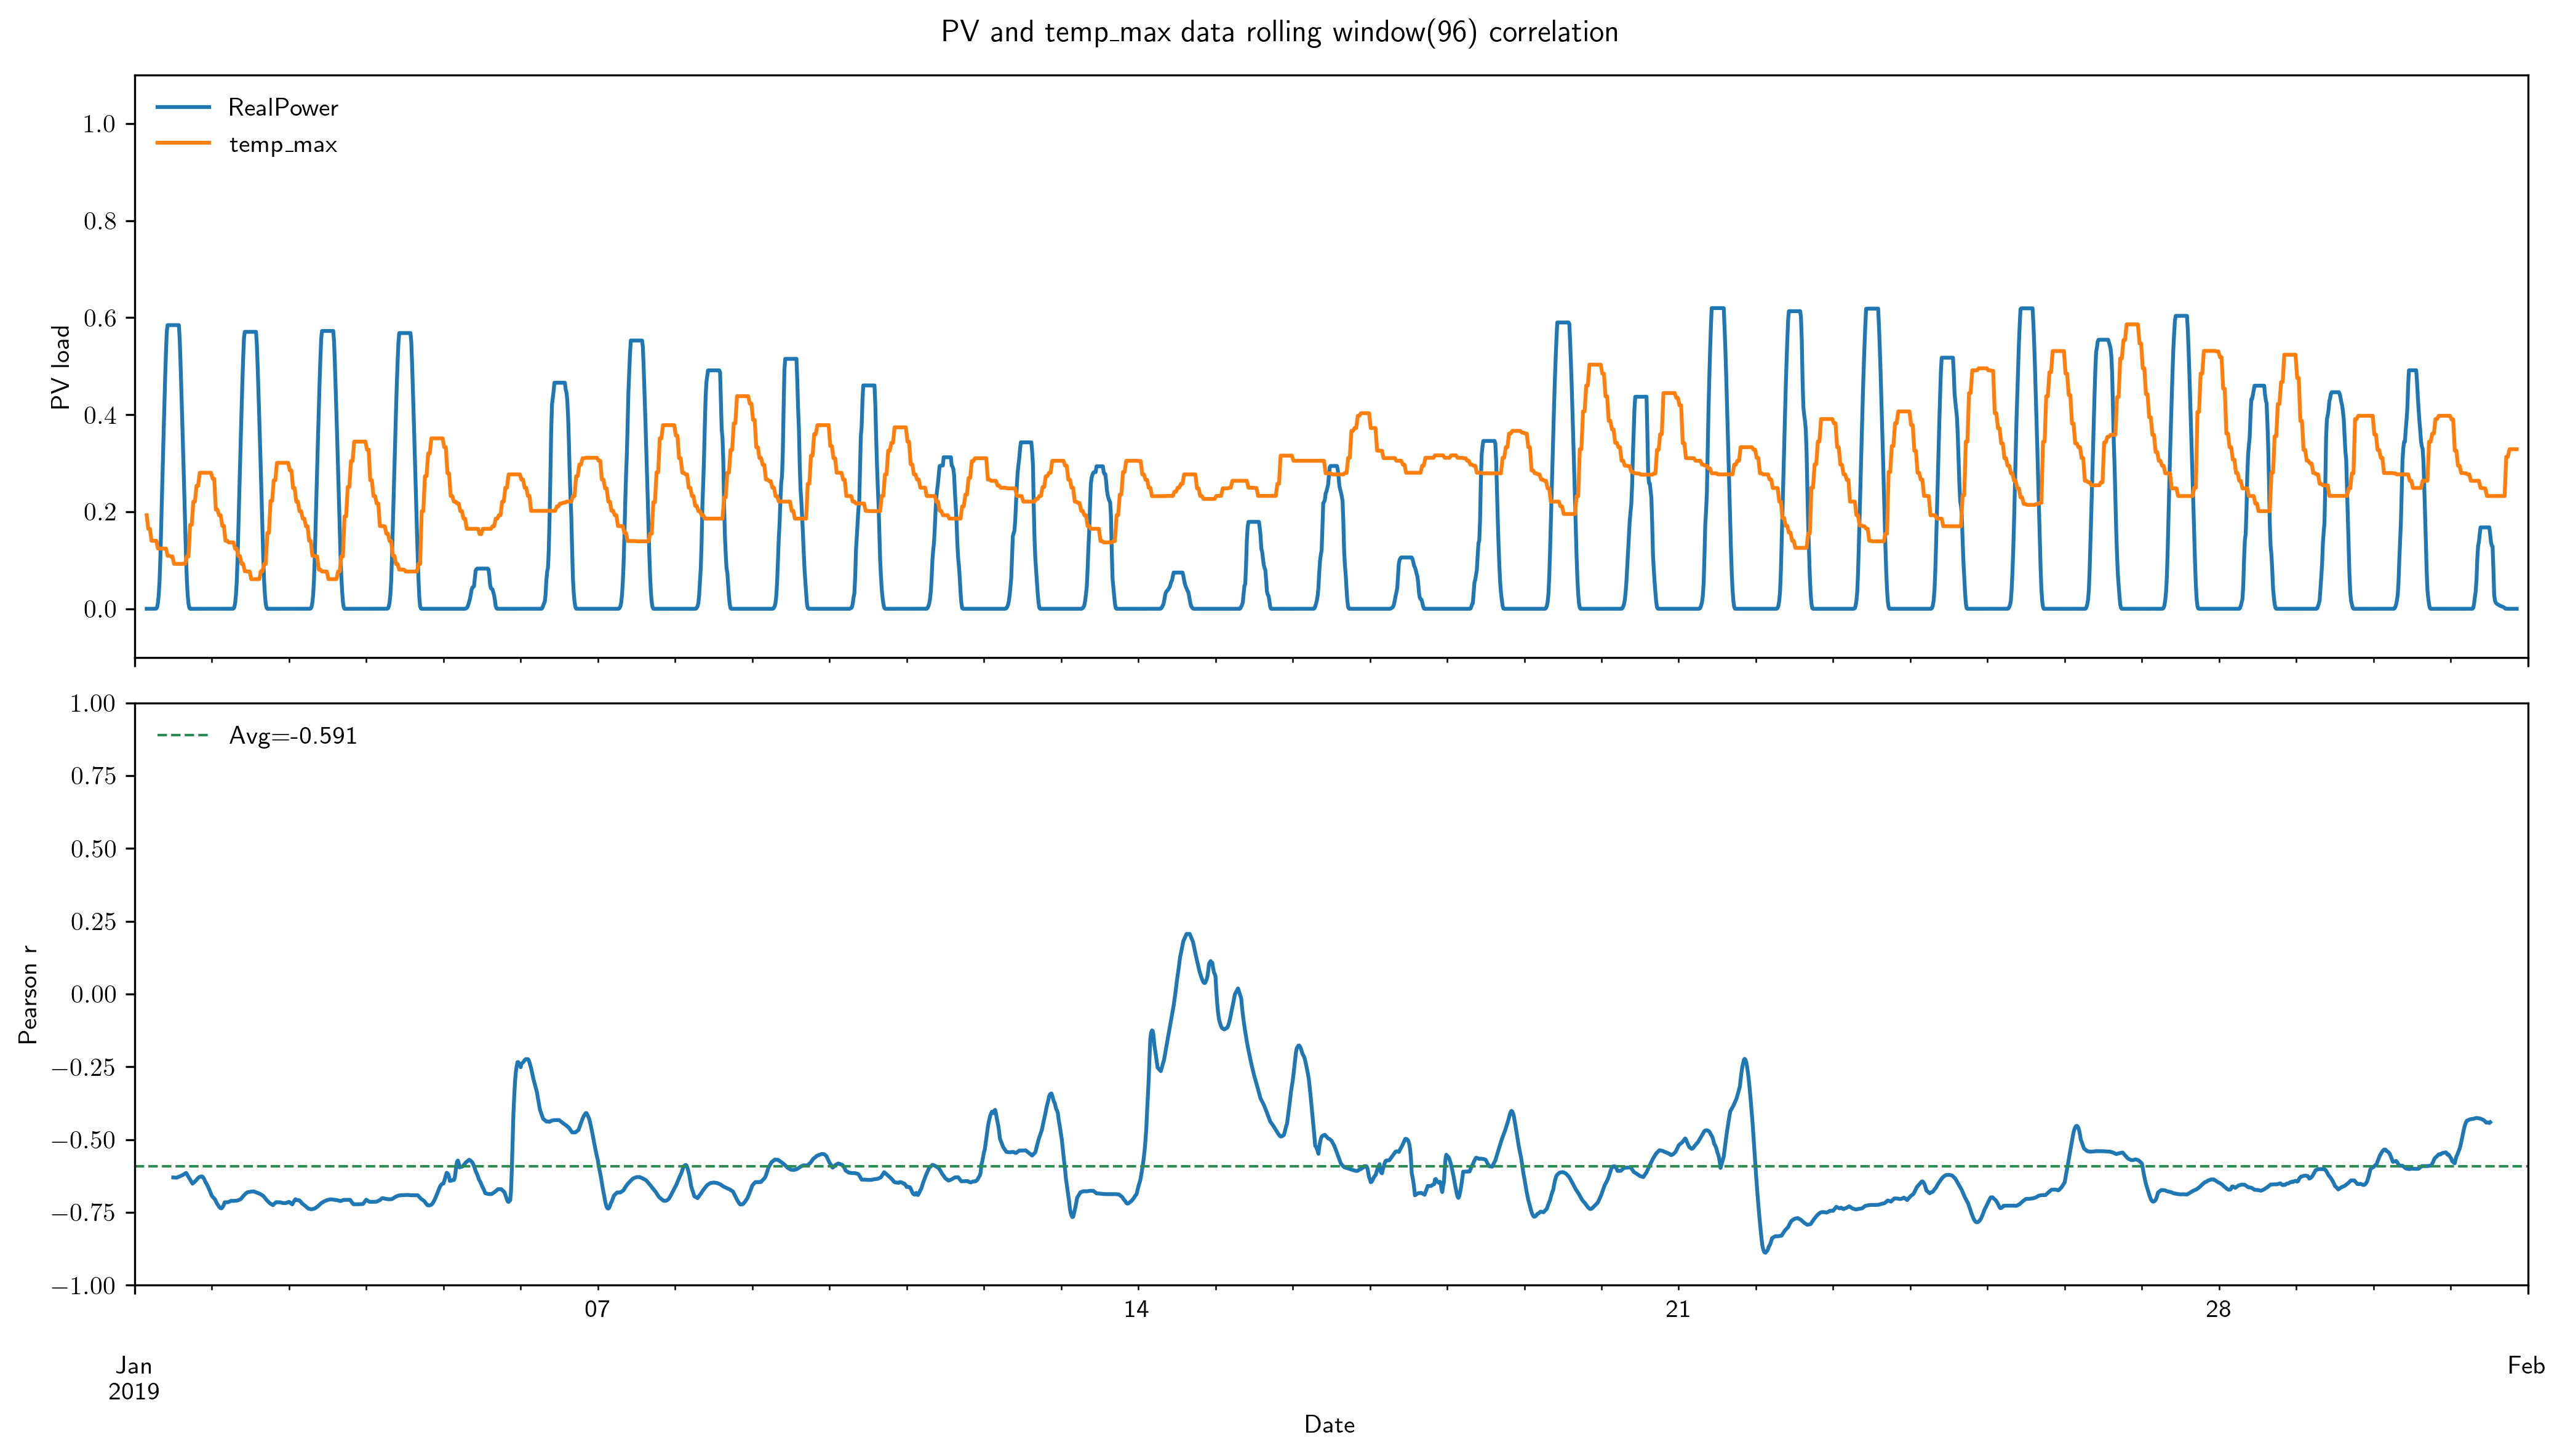

-0.613148399298867


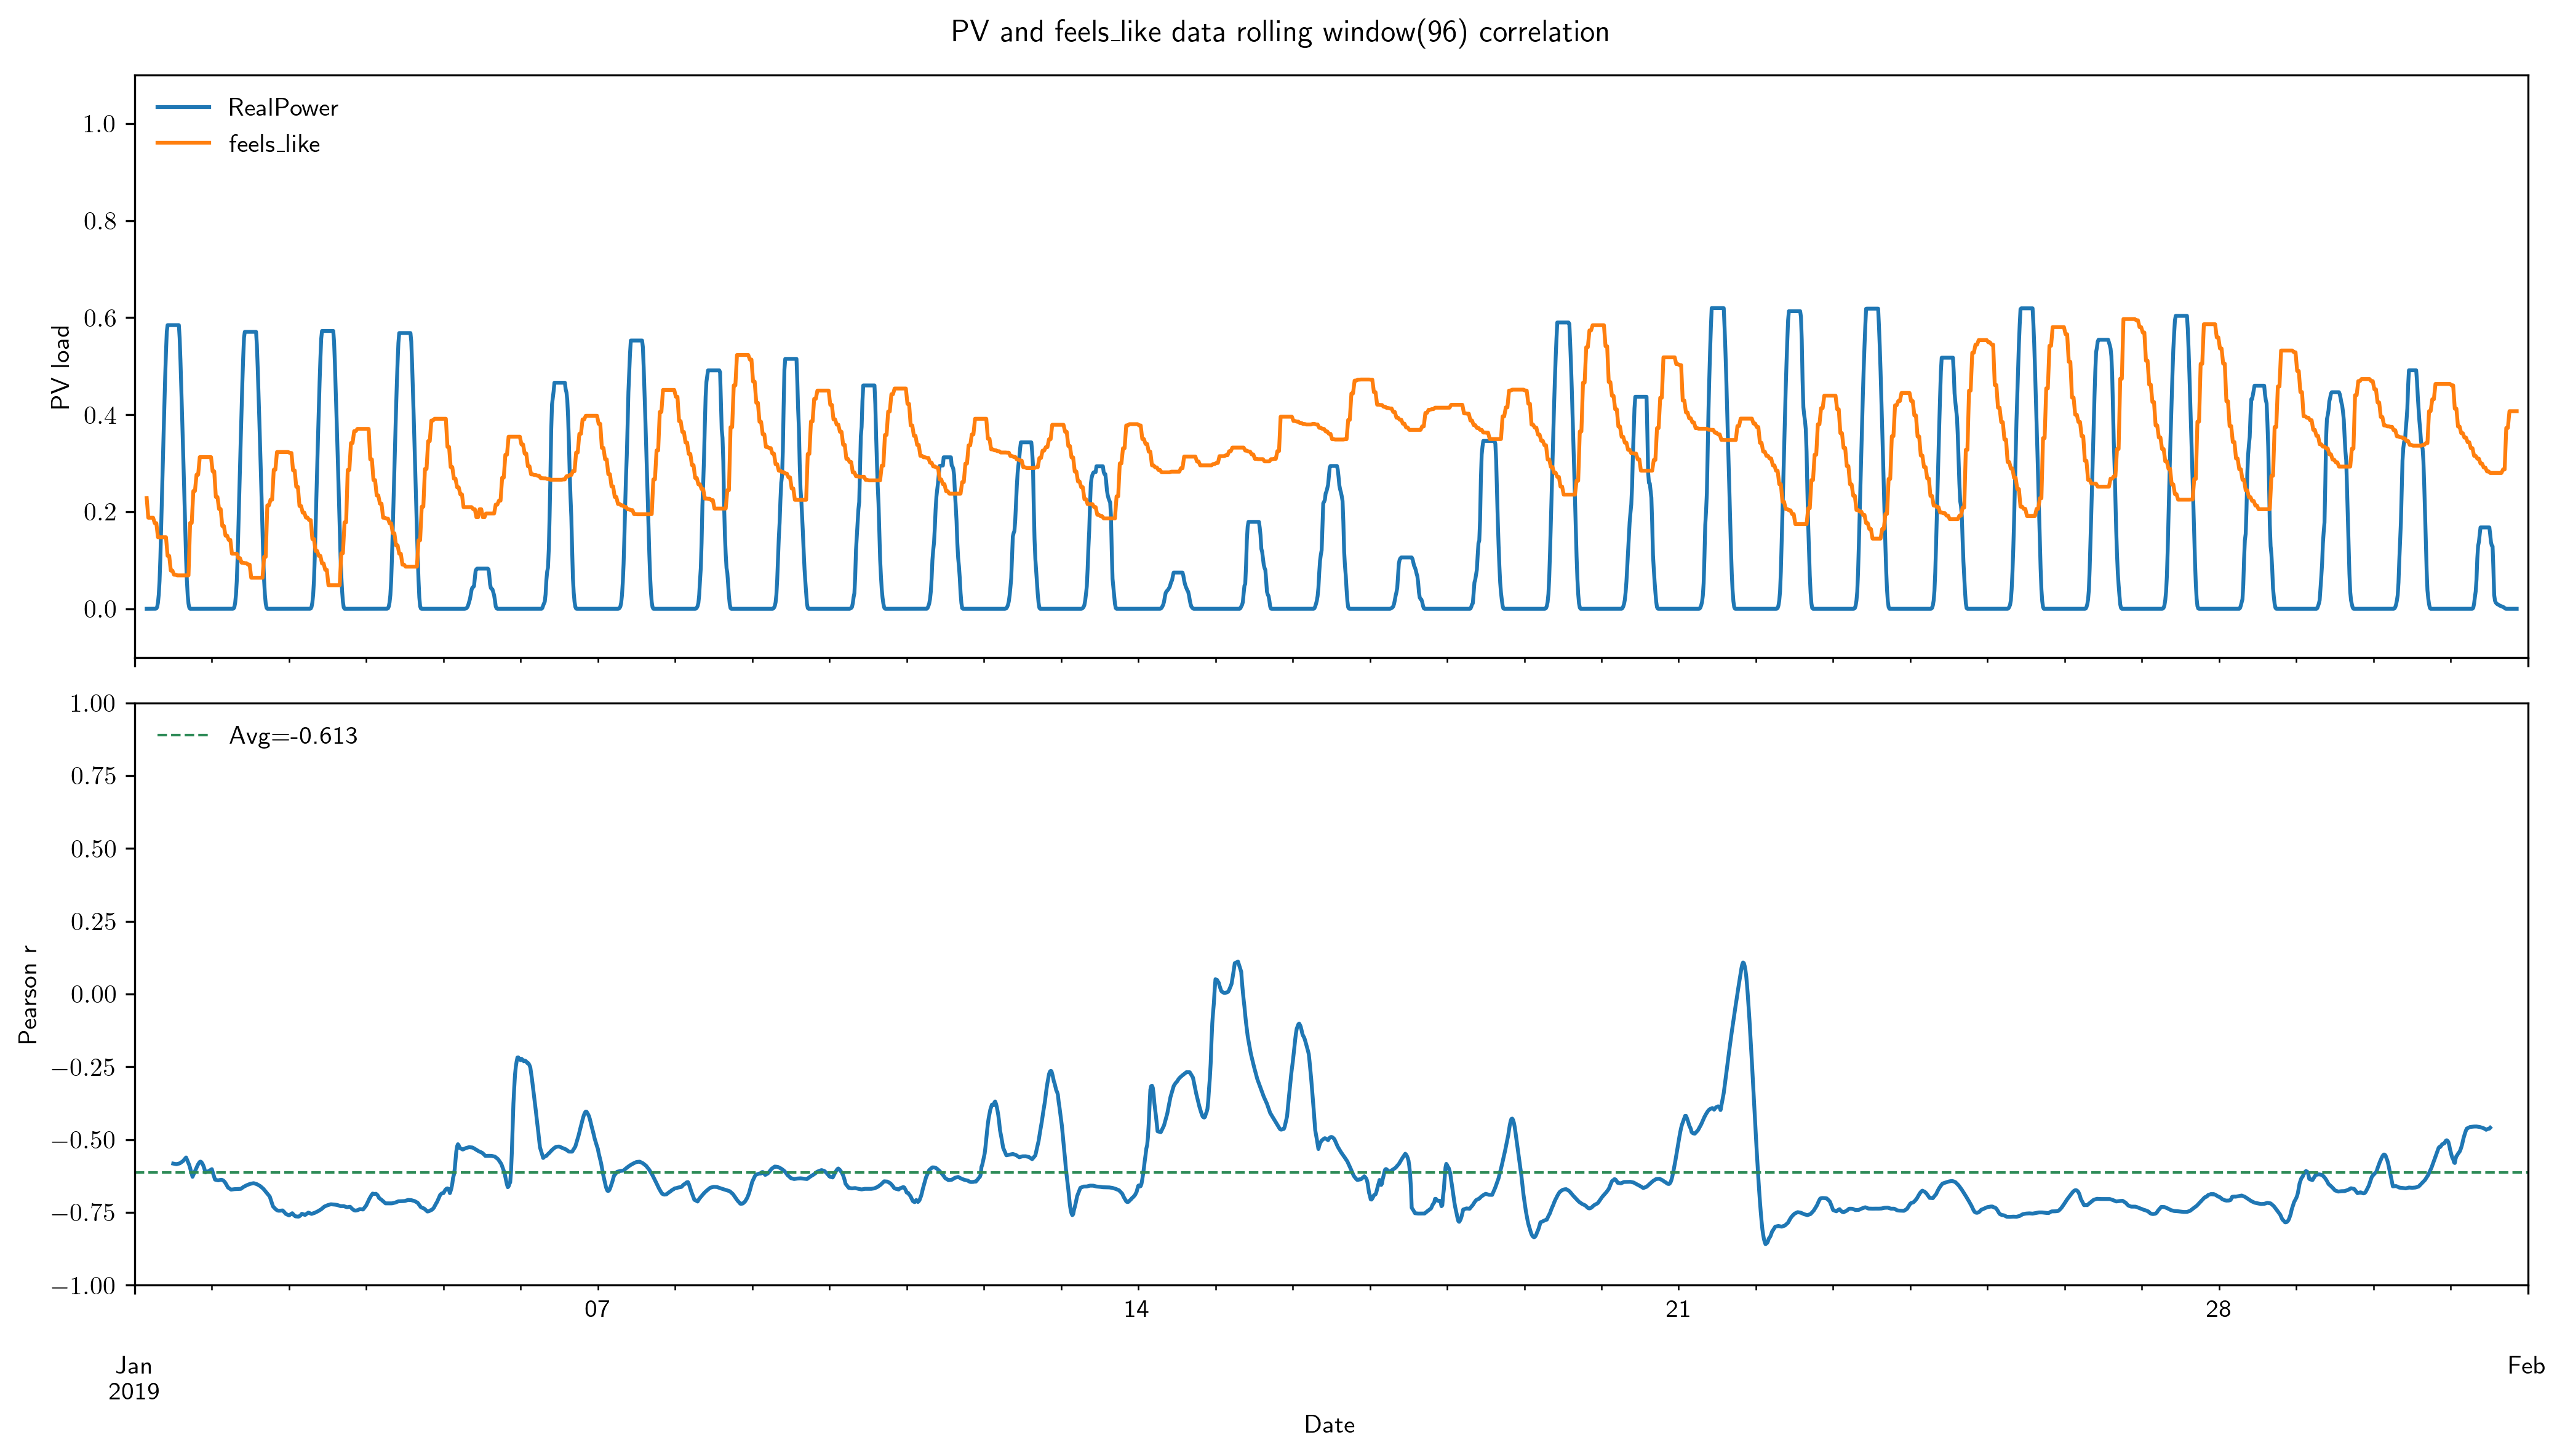

nan


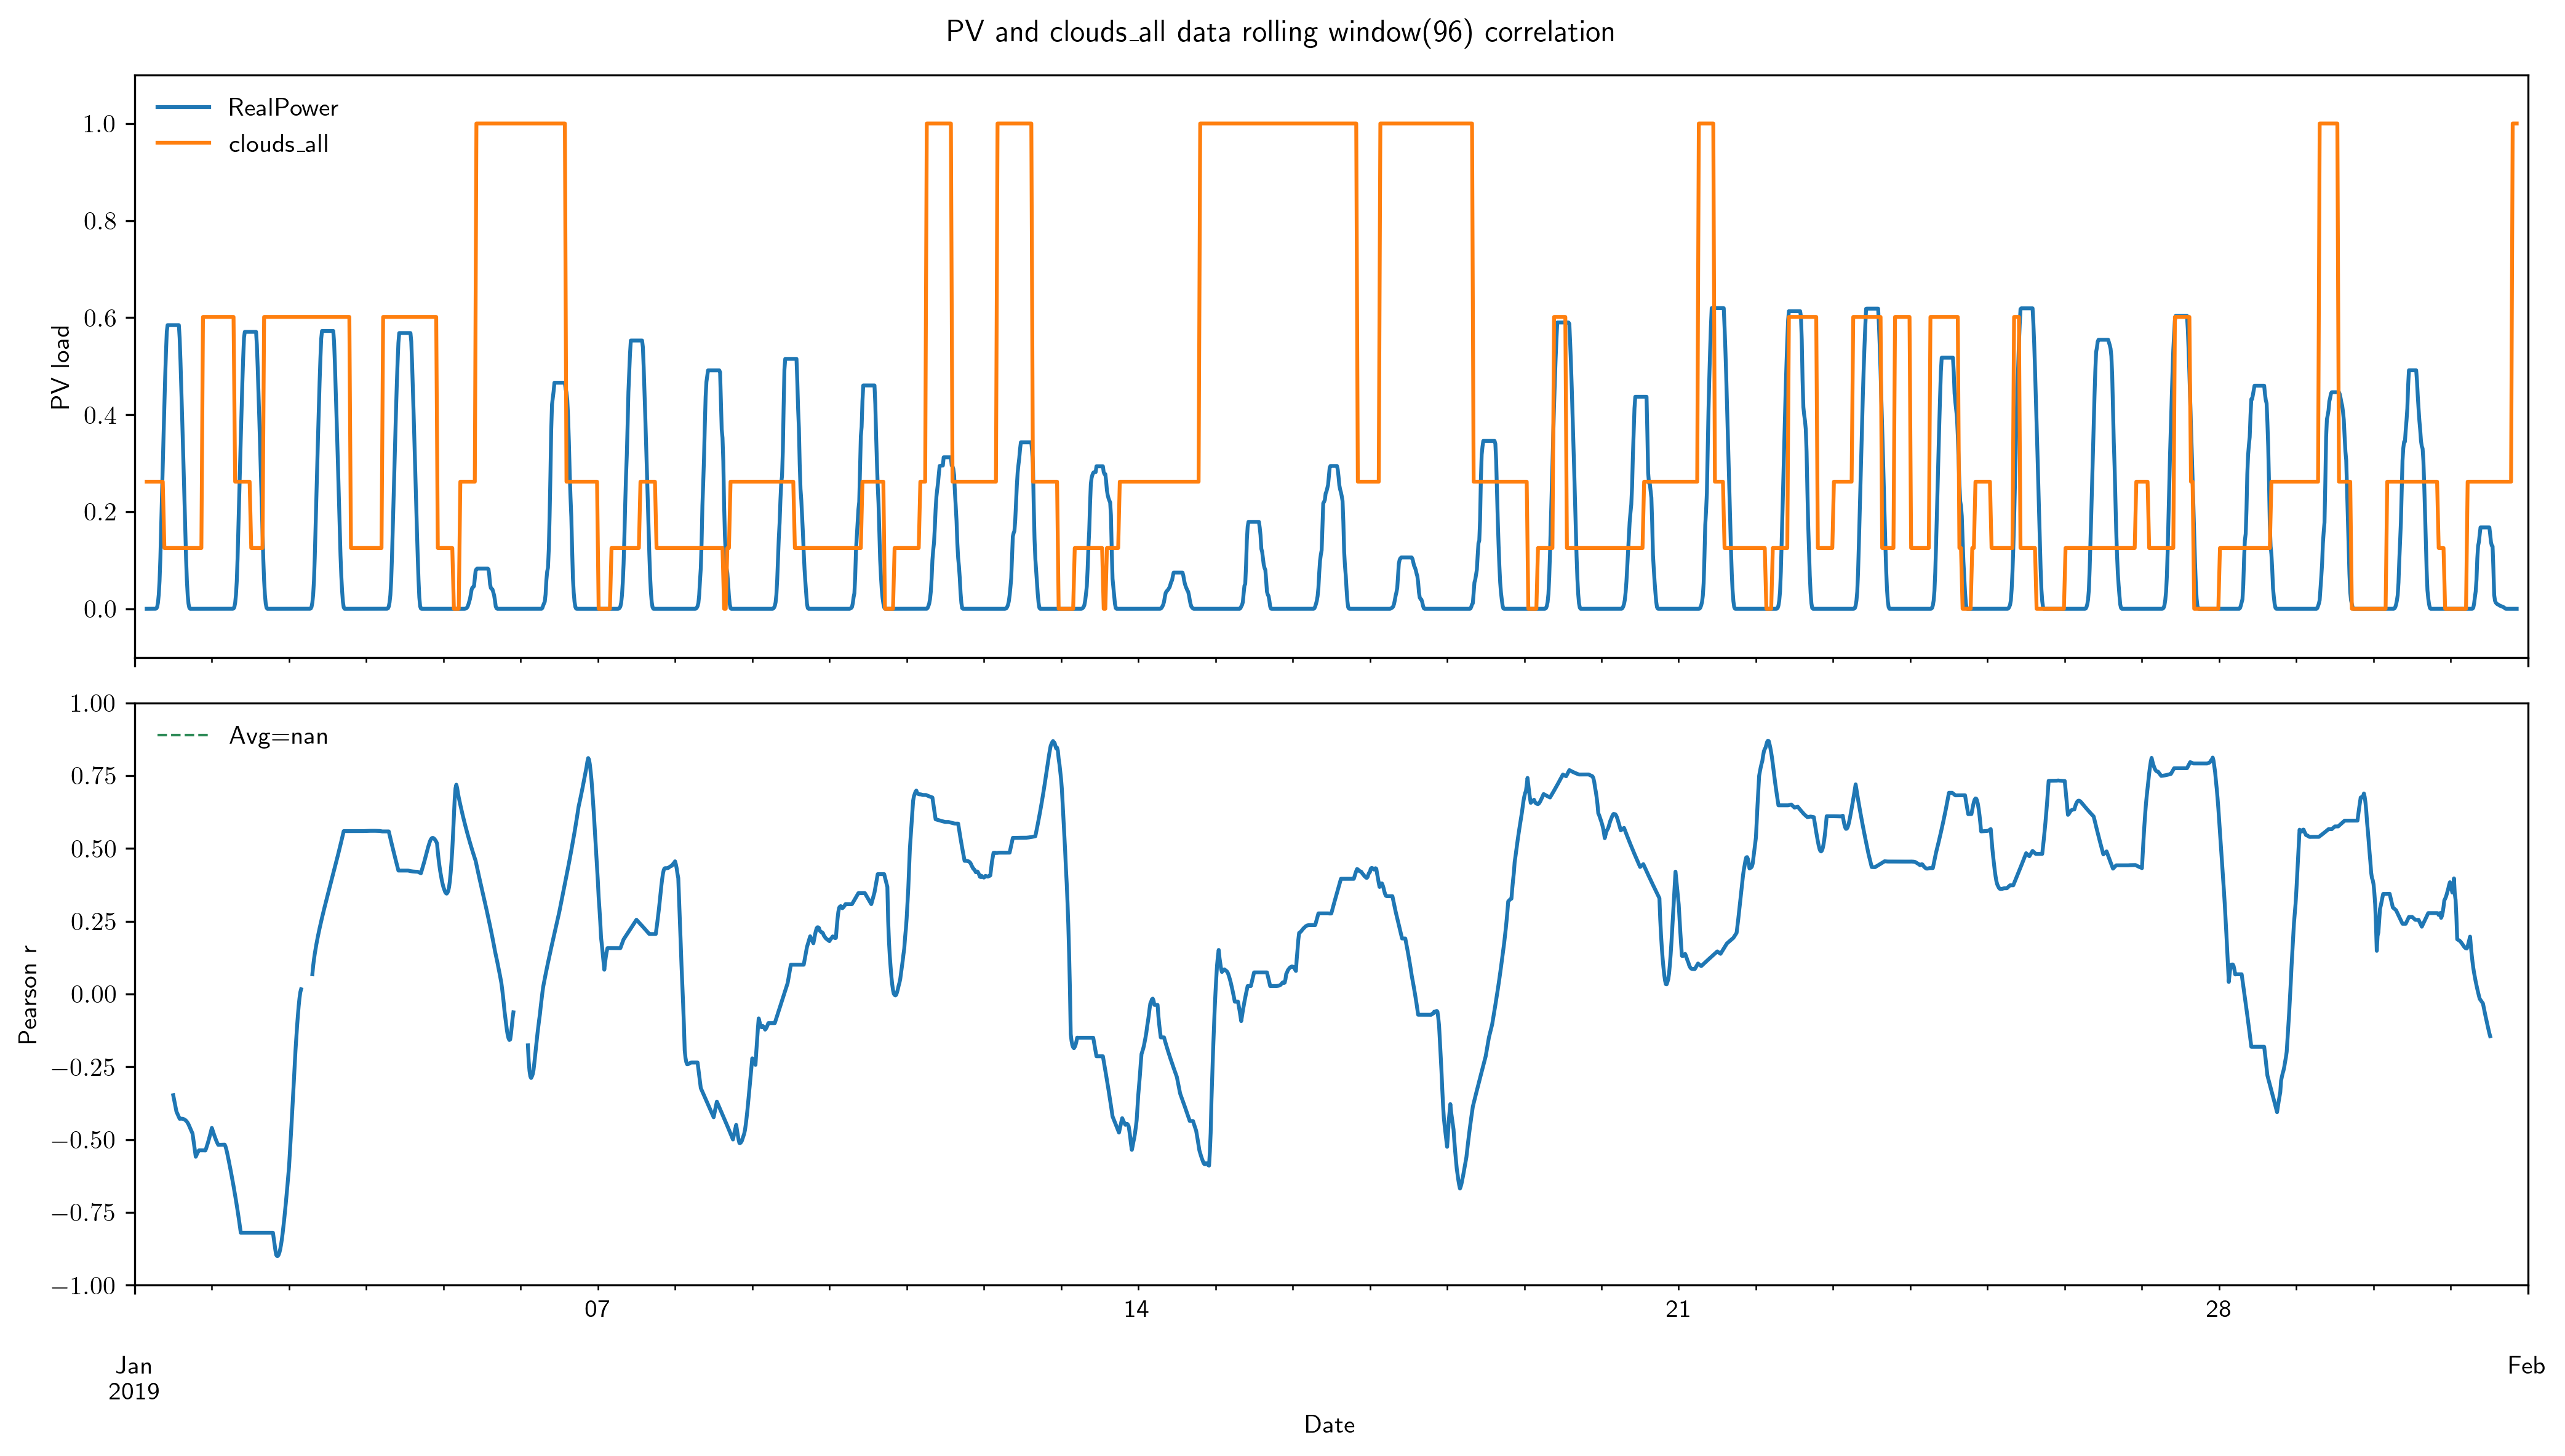

nan


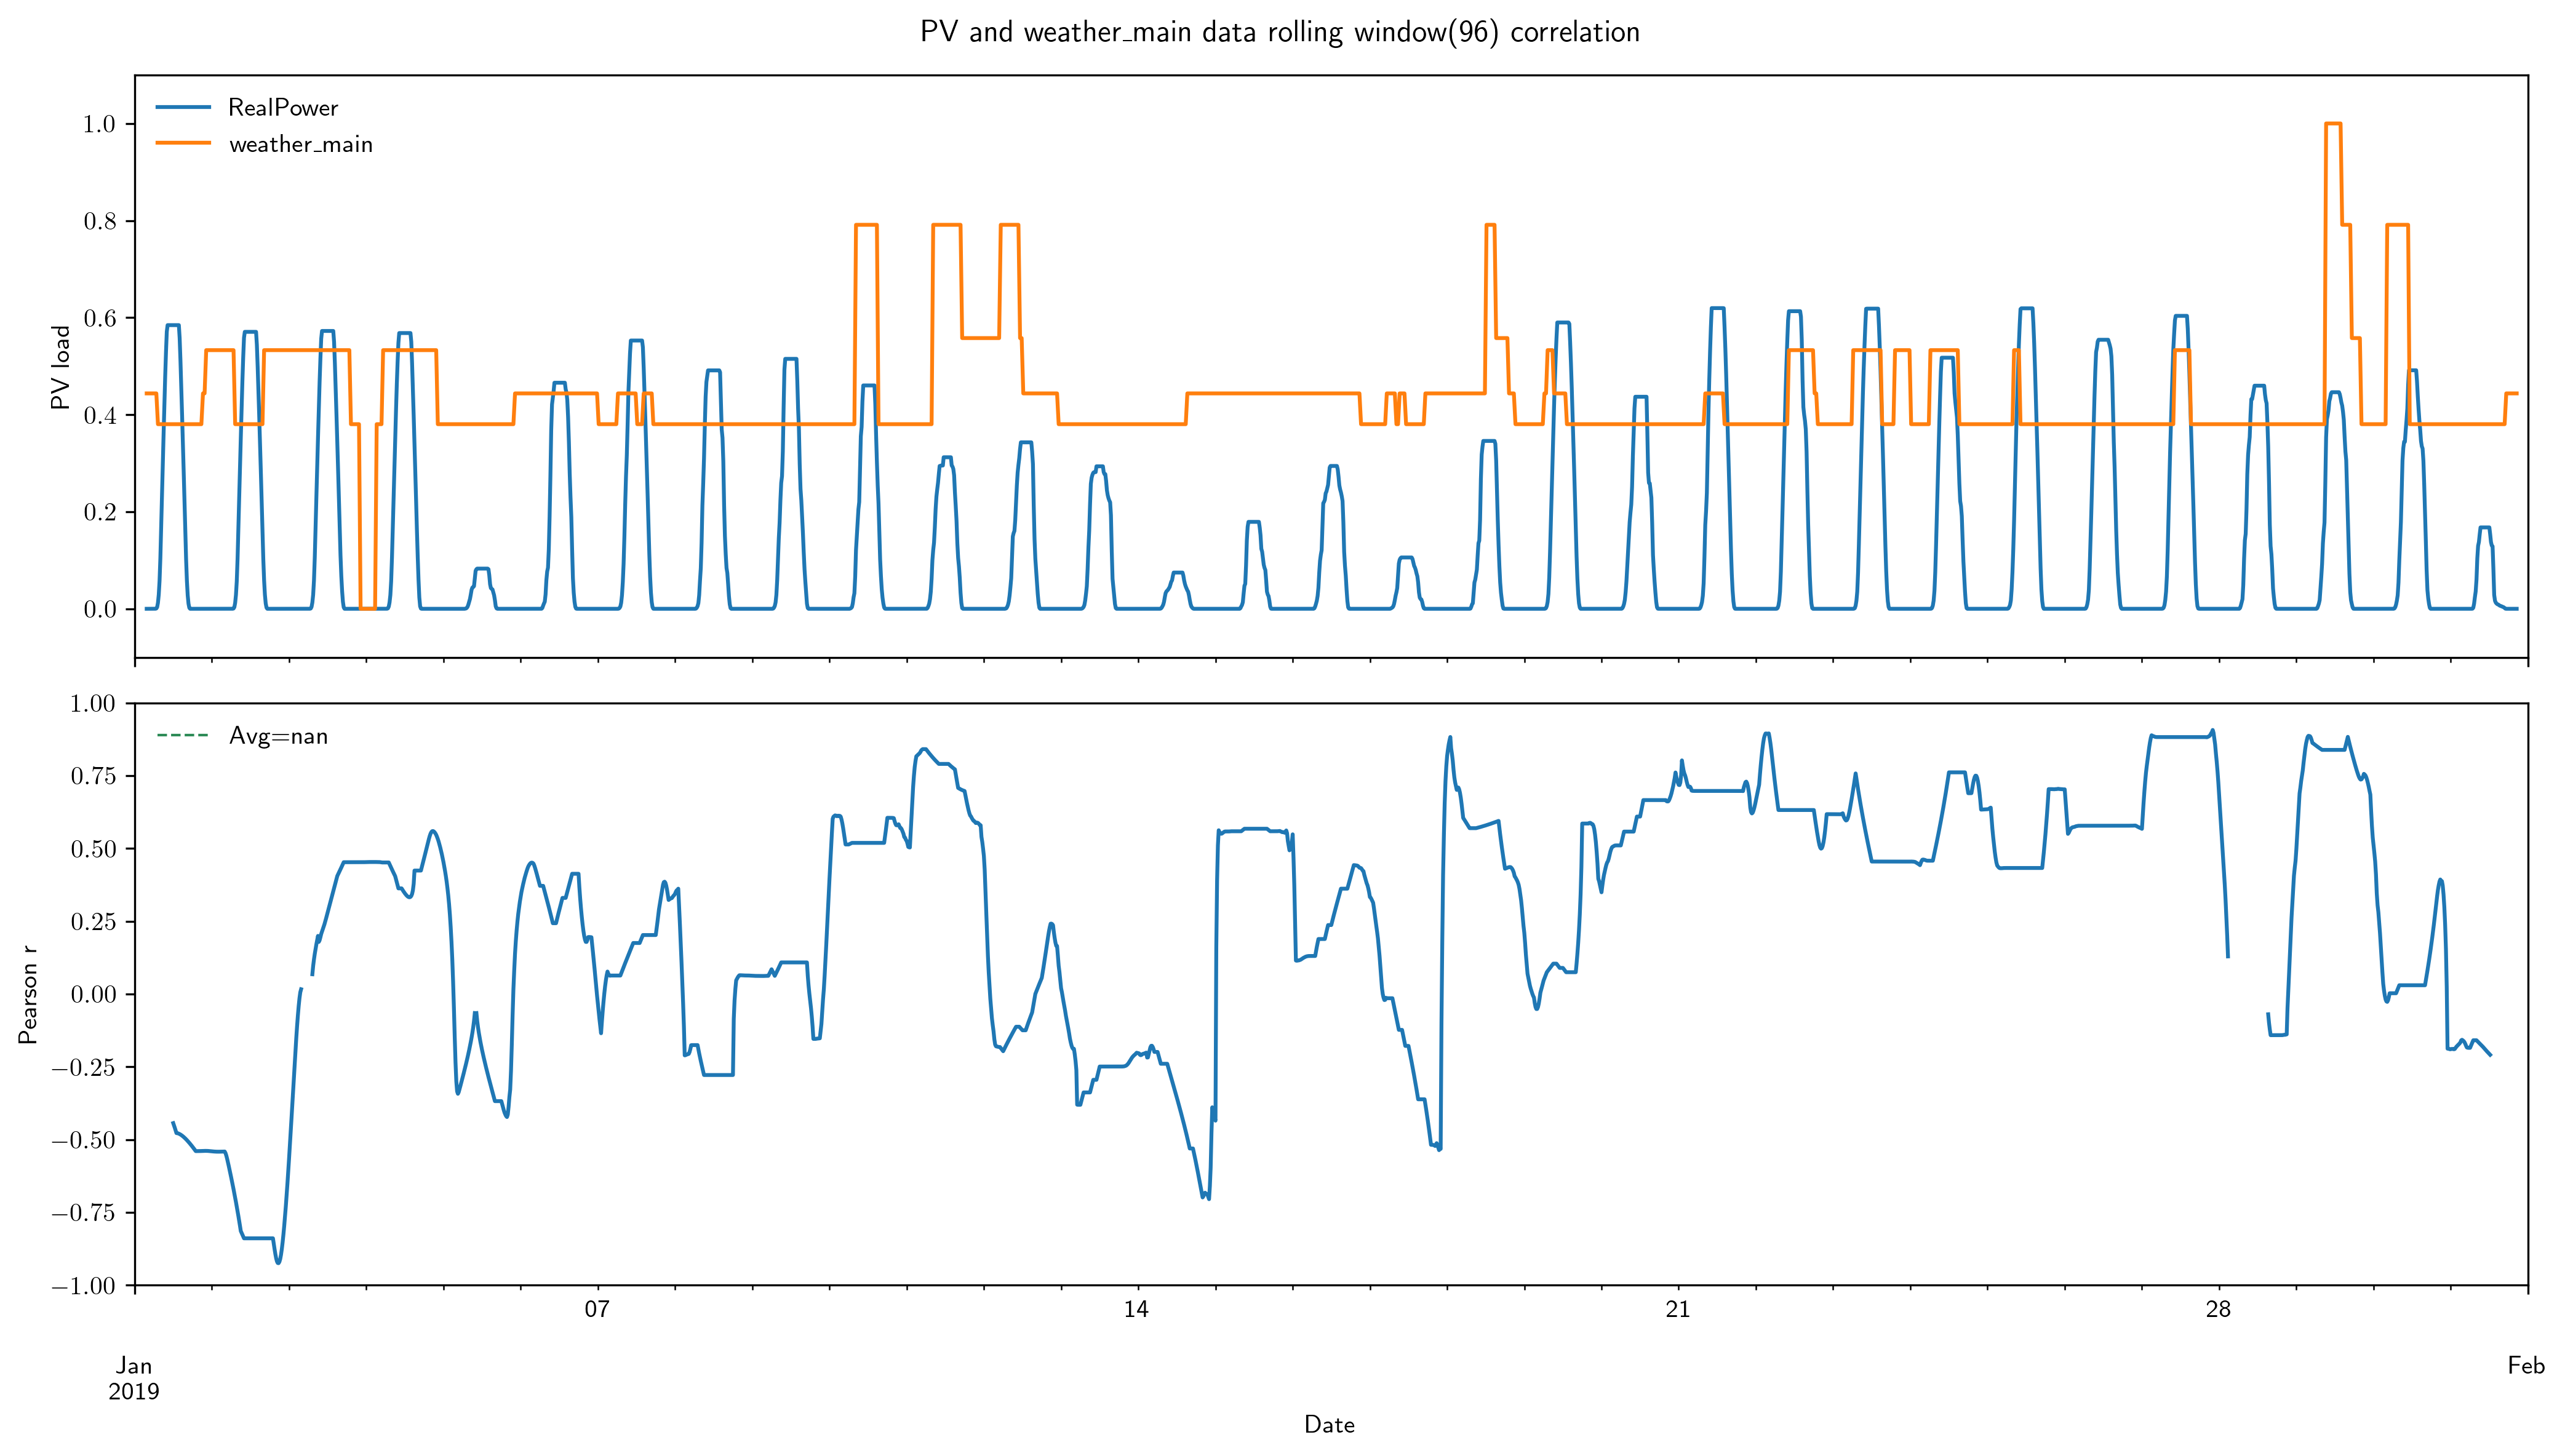

In [121]:
tstart=pd.to_datetime('2019-01-01')
tend=pd.to_datetime('2019-02-01')

key_list=['solar_zenith','temp','temp_min','temp_max','feels_like','clouds_all','weather_main']

for key in key_list:
    person_moving_window(
        df_norm,
        key,
        tstart,
        tend,
        96
    )